Importing Relevant modules and data

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#import warnings
#warnings.filterwarnings("ignore", category=UserWarning) << SNS sometimes makes user errors for me


rawdata = pd.read_csv(r"C:\Users\athar\OneDrive\Documents\School\SIMPLI\PEP1\PEP1 (2).csv")
#change this to fit the PEP1.csv file in your directory

Set Index

In [220]:
rawdata.set_index('Id',inplace=True)

1a: Print Shape

In [221]:
rawdata.shape

(1460, 80)


Dataset Description: 
The dataset contains 1,460 data entries, distributed over 81 columns. Each entry represents a single record of housing data, where the 'Id' column serves as a unique identifier. In addition to this, there are 79 columns that provide various independent features and metadata related to each house. The final column, 'SalePrice', represents the target variable, indicating the house's final sale price.

1B: Null Values

In [222]:
rawdata.isnull().sum().sort_values()

MSSubClass          0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
MasVnrType        872
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 80, dtype: int64

Visualize Null Values

<Axes: >

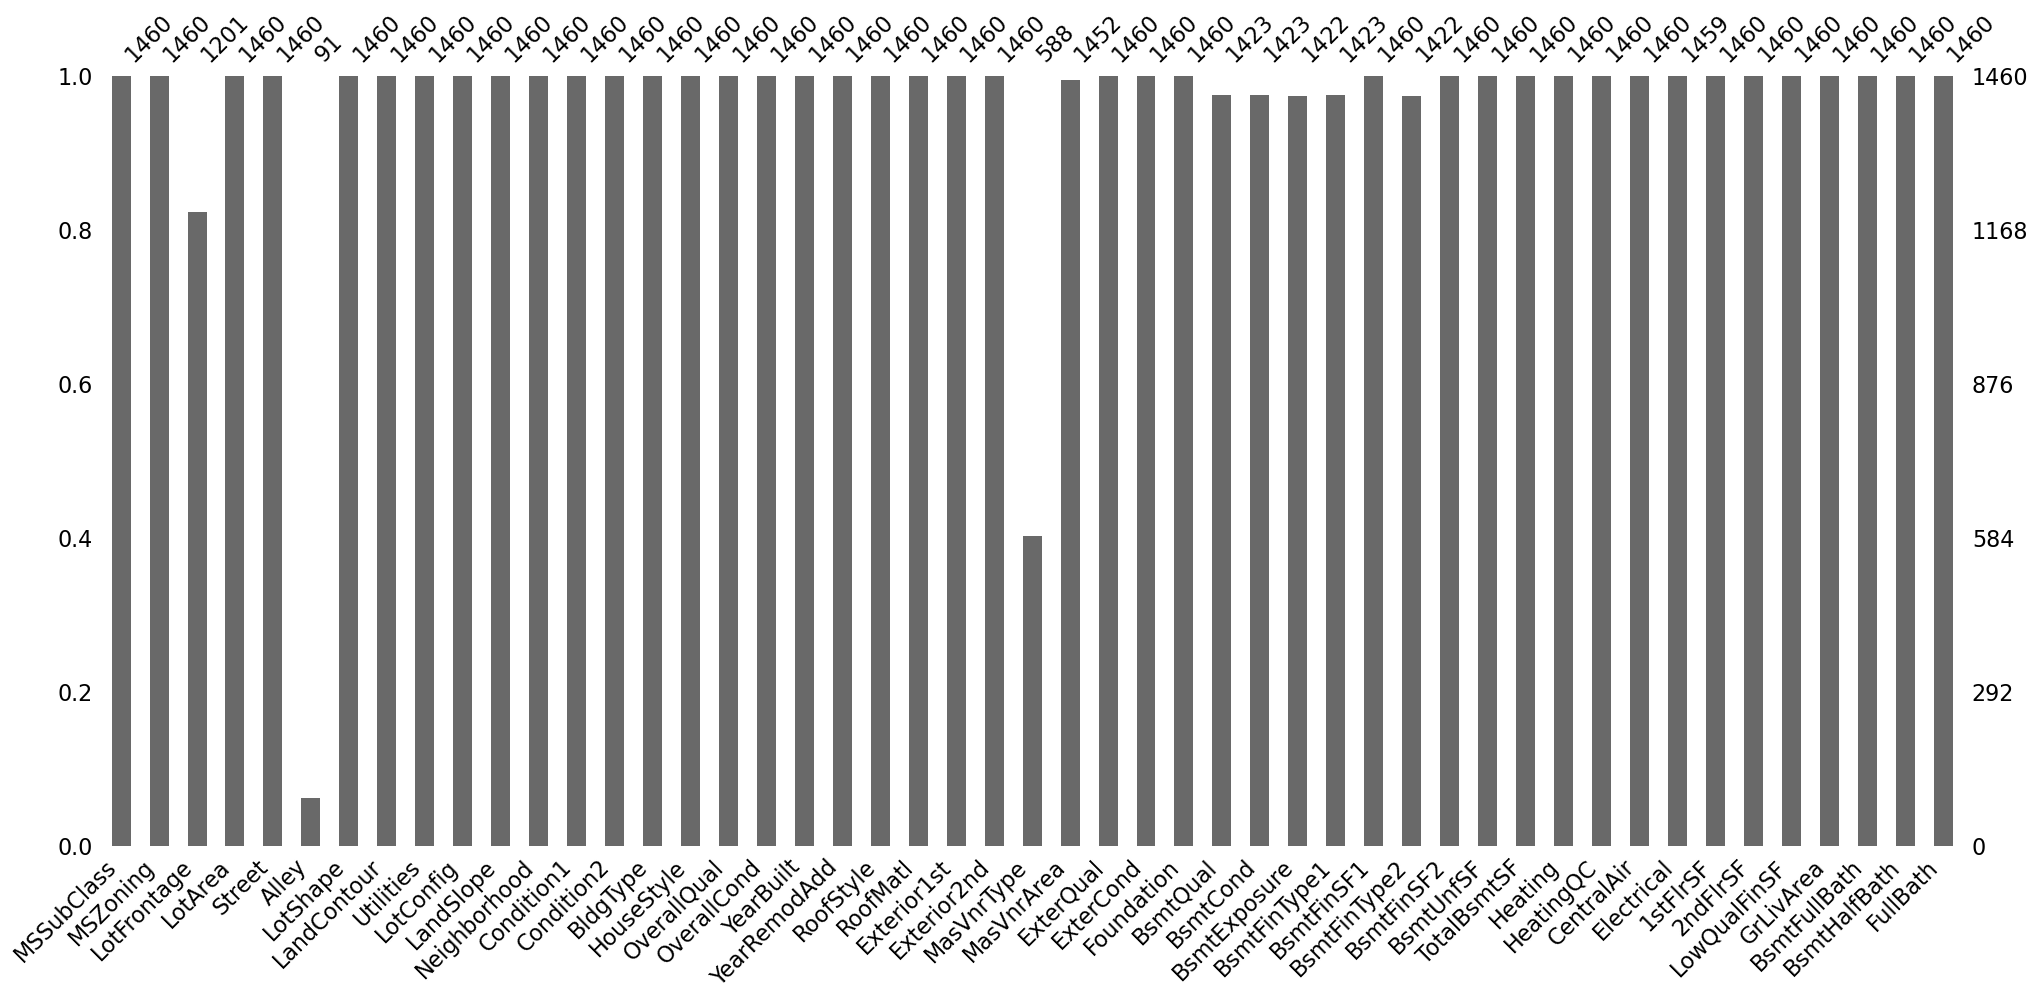

In [223]:
msno.bar(rawdata.iloc[: , :49])

<Axes: >

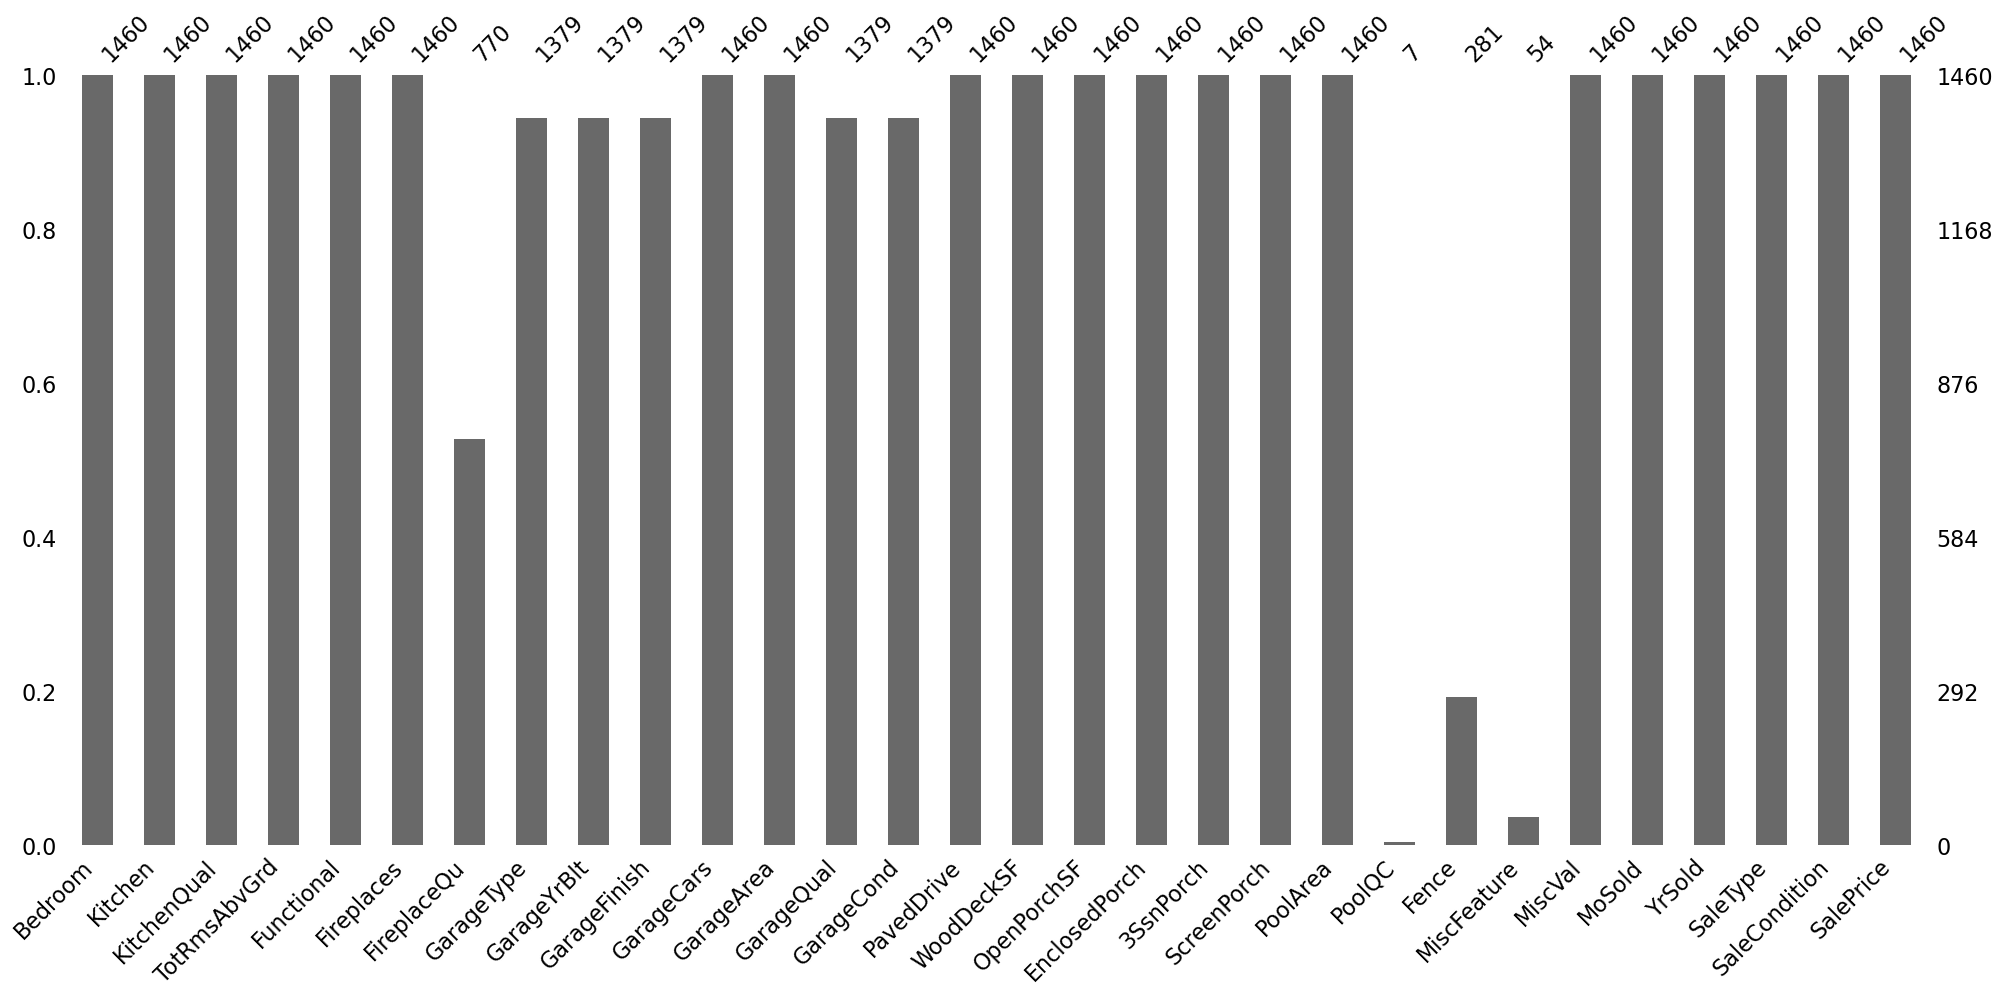

In [224]:
msno.bar(rawdata.iloc[: , 50:])

Drop majority missing value variables

In [225]:
rawdata = rawdata.drop((['PoolQC','MiscFeature','Alley','Fence','LotFrontage','MasVnrType']), axis=1)

1C: Identify Unique Values

In [226]:
unique_values = rawdata.nunique().sort_values()
print(unique_values)

Street             2
Utilities          2
CentralAir         2
HalfBath           3
BsmtHalfBath       3
                ... 
TotalBsmtSF      721
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Length: 74, dtype: int64


In [227]:
for column in rawdata.columns:
    print(rawdata[column].value_counts(dropna=False))
    print('------ \n')

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
------ 

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
------ 

LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64
------ 

Street
Pave    1454
Grvl       6
Name: count, dtype: int64
------ 

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
------ 

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
------ 

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
------ 

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
------ 

LandSlope
Gtl    1382
Mod

2. Breaking into numerical and categorical tables

In [228]:

numvar = rawdata.select_dtypes(include=['float64', 'int64'])

catvar = rawdata.select_dtypes(include=['object'])


#I specifically do not want to include years in numerical variables - we will be splitting them, and binning them into categorical variables 
year_columns = rawdata.filter(regex='.*(yr|Yr|year|Year).*')

catvar = pd.concat([catvar, year_columns], axis=1)
numvar = numvar.drop(columns=year_columns)


In [229]:
print(catvar.shape)
print(numvar.shape)

(1460, 42)
(1460, 32)


Bin SalePrice

<Axes: >

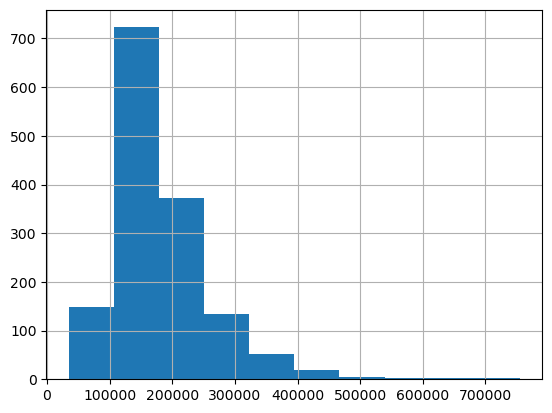

In [230]:
numvar['SalePrice'].hist()

In [231]:
# 7 bins looks good here
labels = ['LVL1', 'LVL2', 'LVL3', 'LVL4', 'LV5', 'LVL6', 'LVL7']
catvar['priceLevel'] = pd.cut(numvar.SalePrice, bins = 7, labels= labels)
catvar['priceLevel'].value_counts()

priceLevel
LVL2    751
LVL1    464
LVL3    186
LVL4     45
LV5       7
LVL6      5
LVL7      2
Name: count, dtype: int64

Display categorical values to confirm

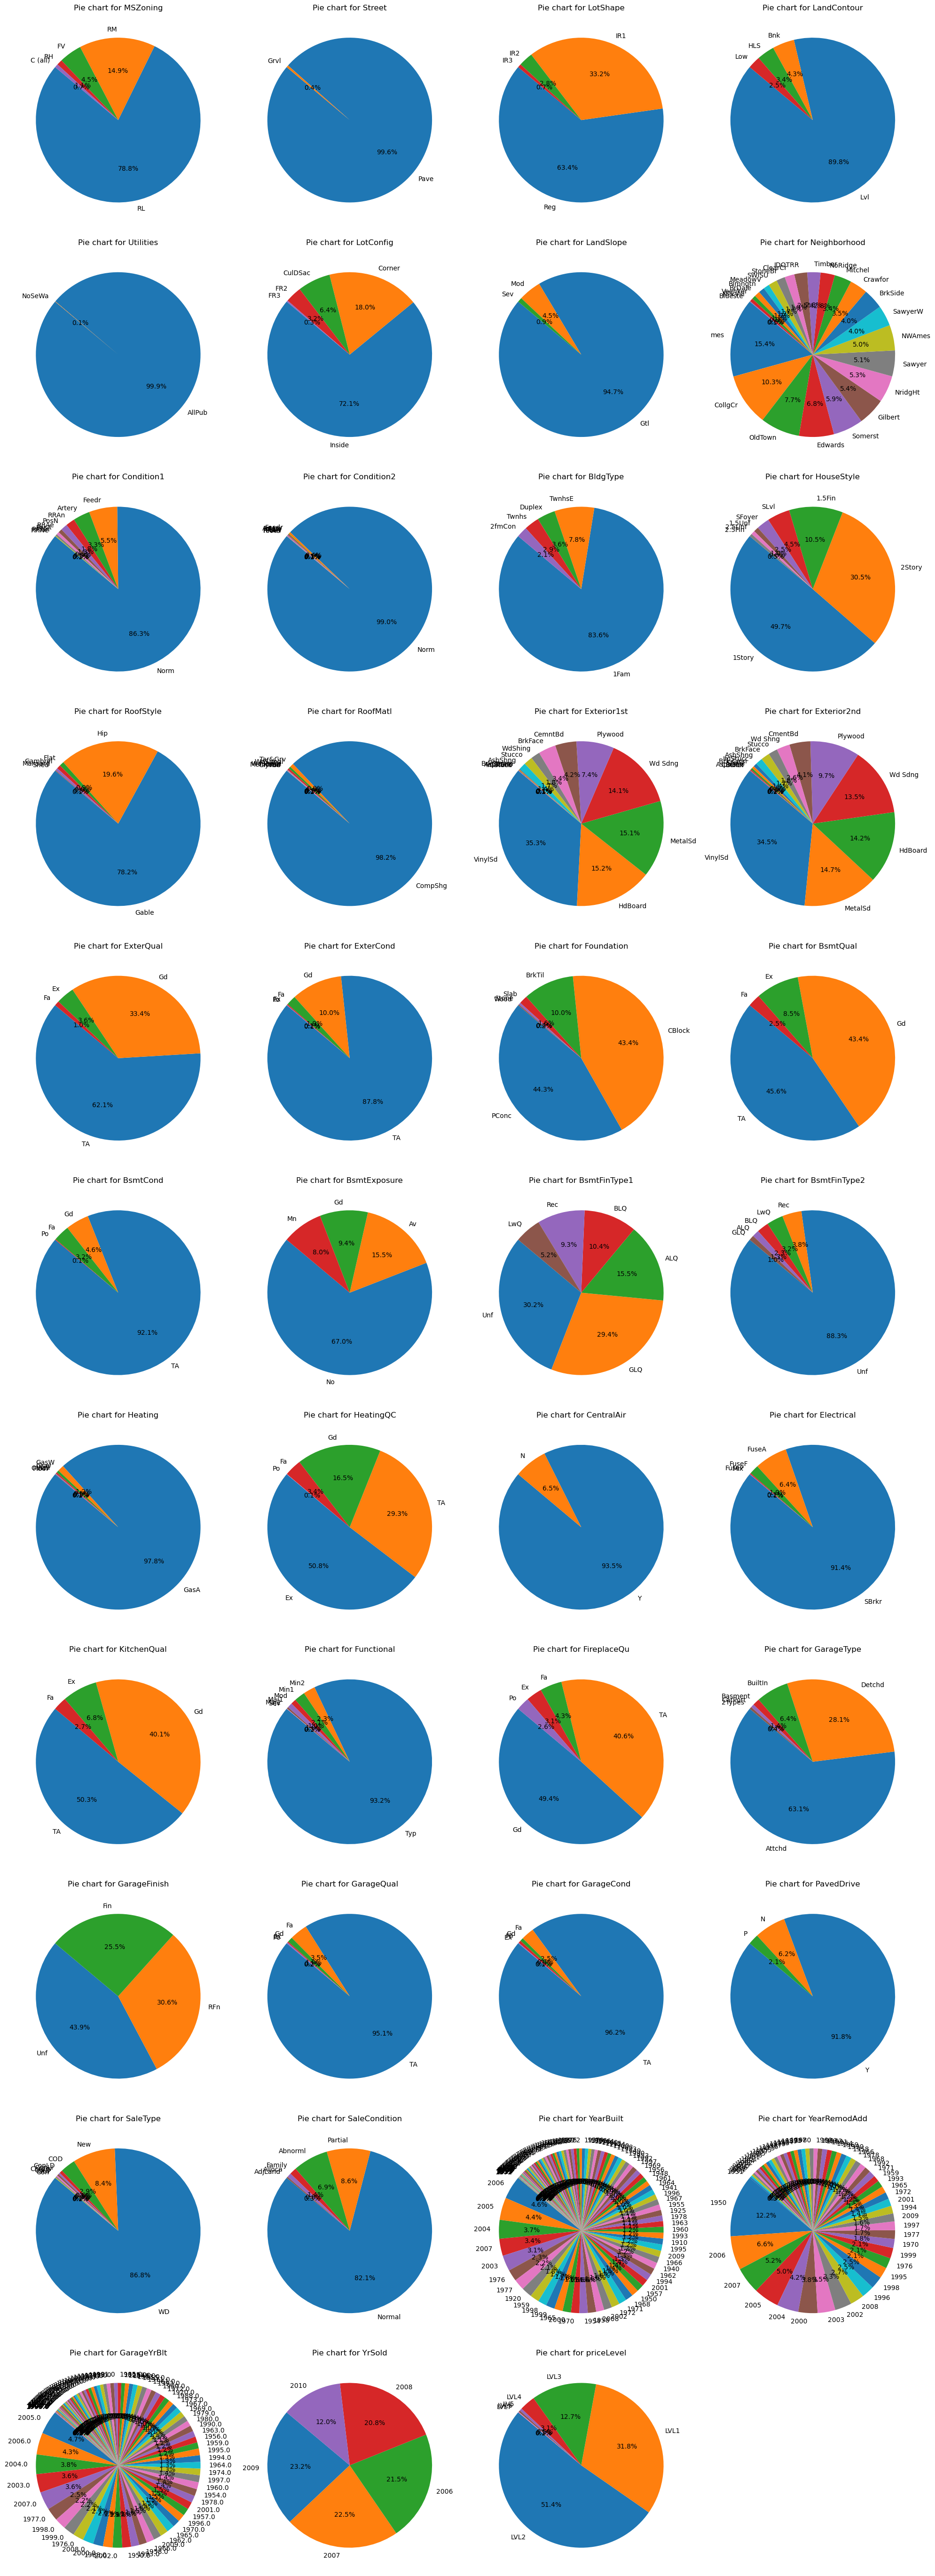

In [232]:
cols = 4
rows = len(catvar.columns) // cols + (len(catvar.columns) % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Adjust the figure size as needed
axes = axes.flatten()

for idx, column in enumerate(catvar.columns):
    counts = catvar[column].value_counts()  # Get the count of each unique value in the column
    axes[idx].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)  # Plot pie chart on the specific subplot
    axes[idx].set_title(f'Pie chart for {column}')  # Set title for the pie chart
    axes[idx].axis('equal')  # Set aspect of the plot to be equal


for idx in range(len(catvar.columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()  # Display all the pie charts at once


exterior1st, exterior2nd. neighborhood, and the year columns have many unique values. This might cause trouble when encoding.

We'll touch on that during the Step 4 Categorical EDA

Step 3: Numerical EDA

In [233]:
numvar.isnull().sum().sort_values()

MSSubClass       0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
TotRmsAbvGrd     0
Kitchen          0
Bedroom          0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
OverallCond      0
OverallQual      0
LotArea          0
MoSold           0
SalePrice        0
MasVnrArea       8
dtype: int64

No missing values

(Note - I chose to drop LotFrontage earlier instead of including it)


skew + dist analysis

In [234]:

numvarskew = numvar.skew(axis=0).sort_values(ascending=False)
print(numvarskew)
print((numvarskew > 1).astype(int).sum(axis=0), "variables are highly skewed")

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
Kitchen           4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
Bedroom           0.211790
GarageArea        0.179981
FullBath          0.036562
GarageCars       -0.342549
dtype: float64
19 variables are highly skewed


Find Skew of numerical variables

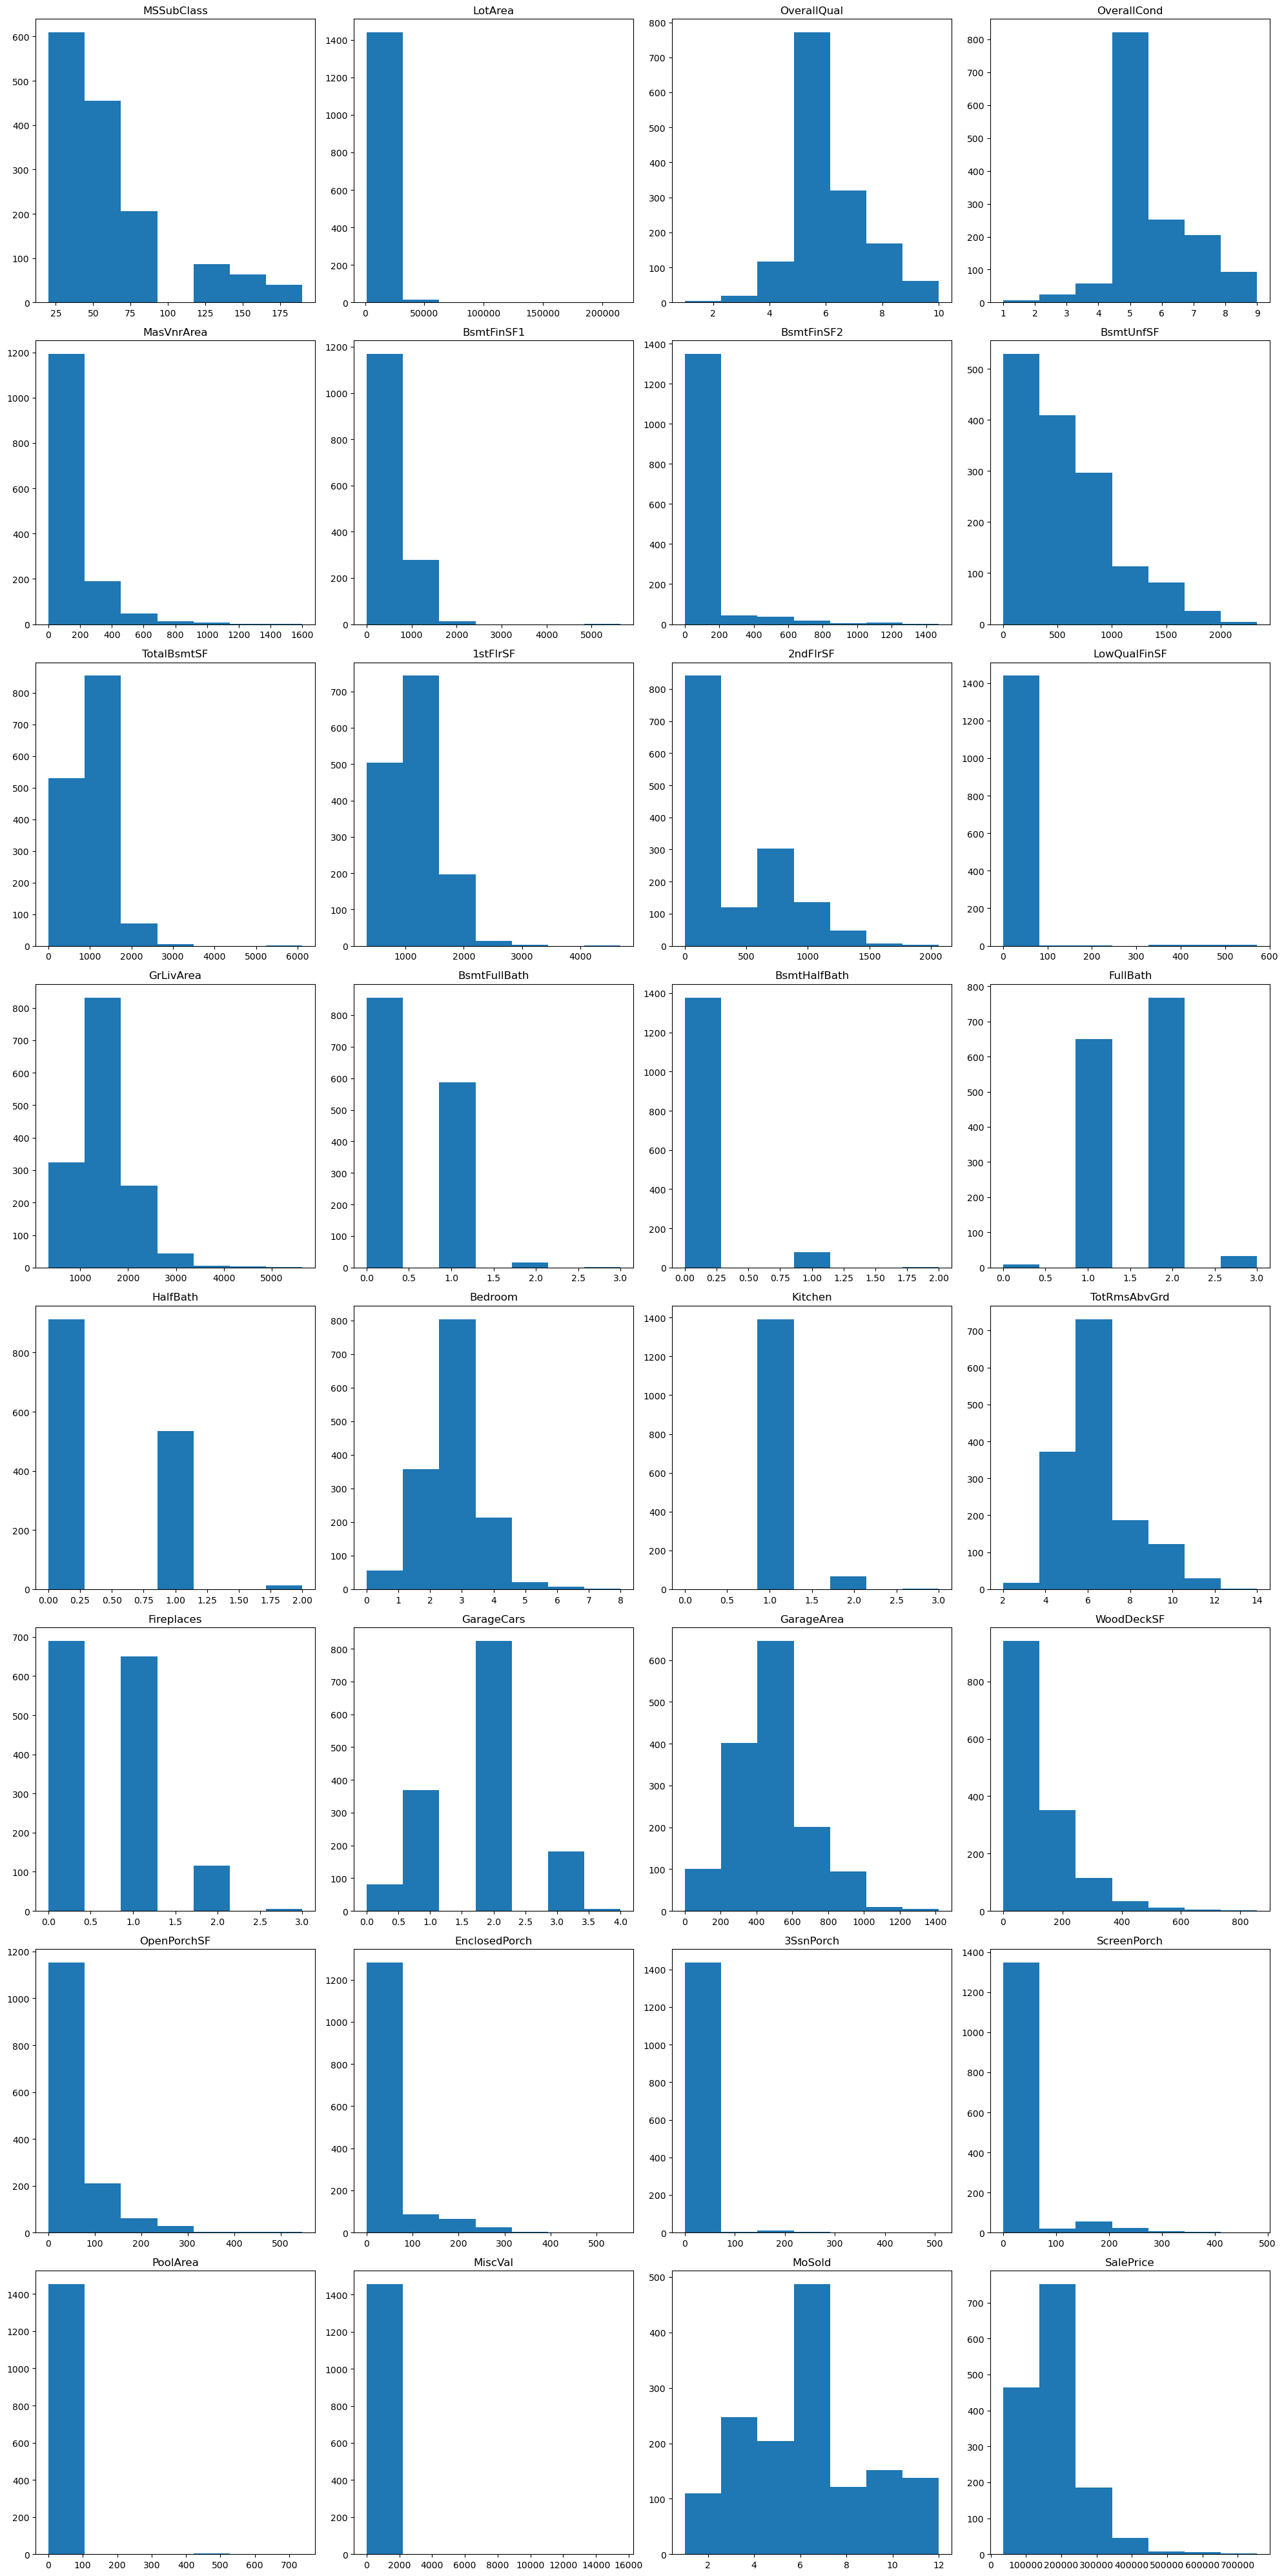

In [235]:


# Get the number of variables to plot
varColumns2 = numvar.columns
n_vars = len(varColumns2)

# Calculate the number of rows needed for subplots (4 columns per row)
n_rows = (n_vars + 3) // 4  # Add 3 and integer divide by 4 to ensure rounding up

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Plot a histogram in each subplot
for i, col in enumerate(varColumns2):
    axes[i].hist(numvar[col], bins=7)
    axes[i].set_title(col)

# If the number of plots is not a multiple of 4, we may have some empty subplots
# Hide any extra subplots that aren't needed
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust the layout to make sure there's no overlap
plt.show()  # Display the plots


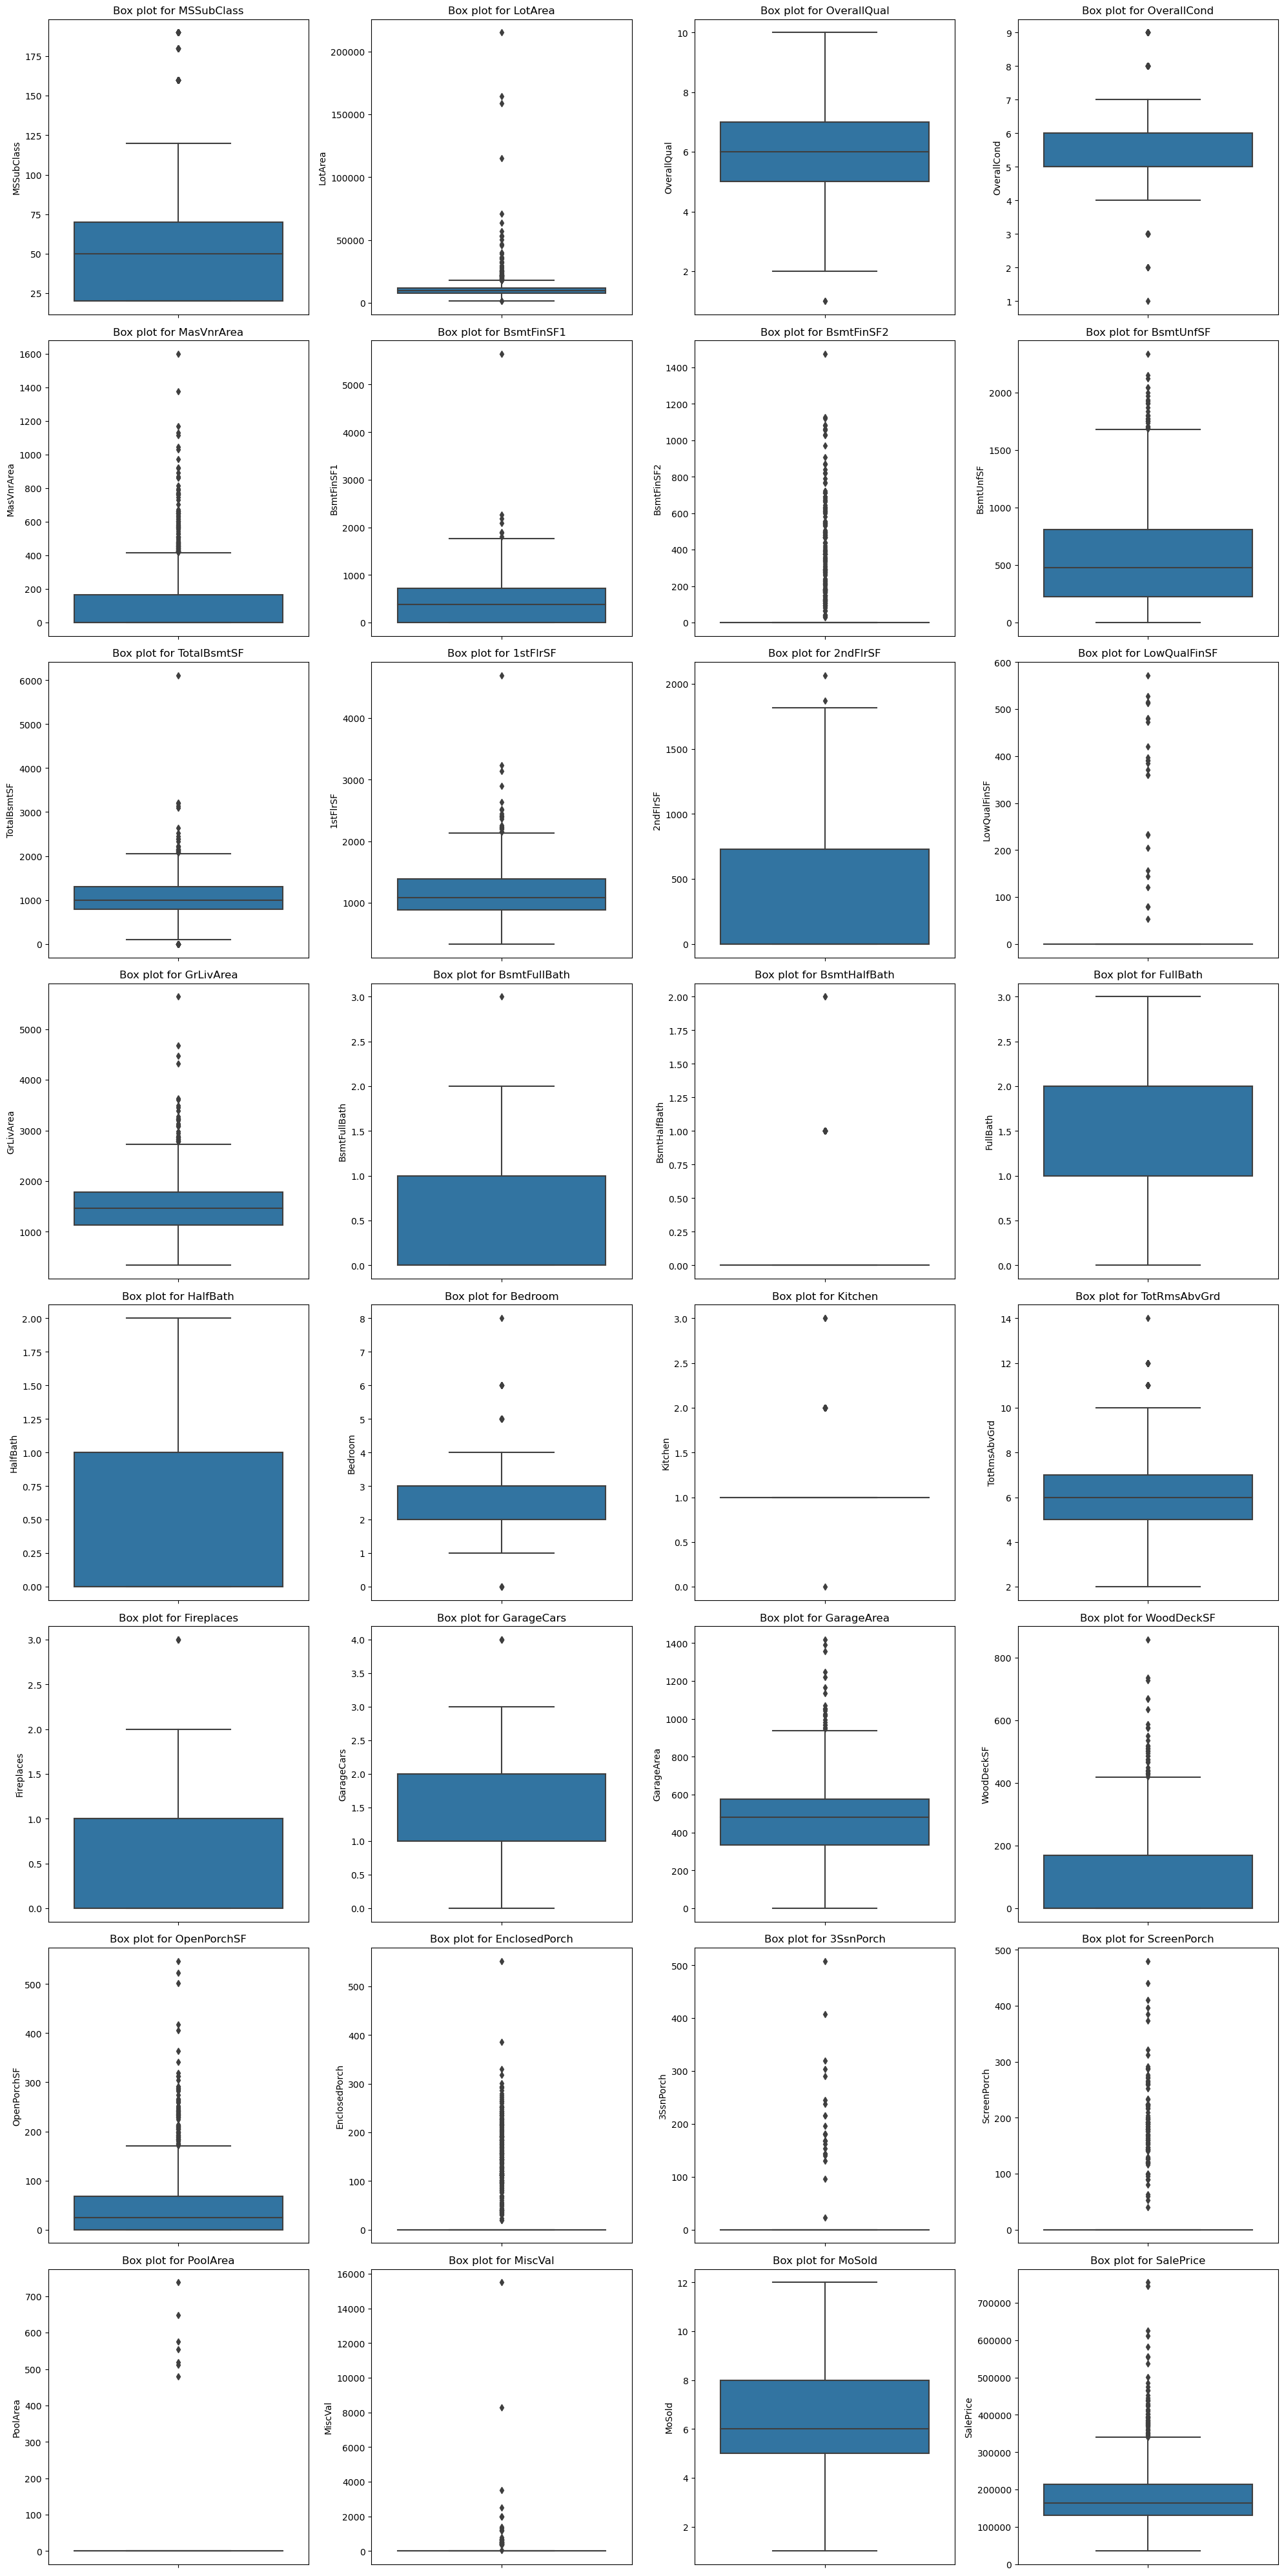

In [236]:
cols = 4
# Calculate the number of rows needed
rows = len(numvar.columns) // cols + (len(numvar.columns) % cols > 0)

# Create a new figure with specified size
plt.figure(figsize=(20, 5 * rows))

# Iterate over each numerical column
for idx, column in enumerate(numvar.columns):
    plt.subplot(rows, cols, idx + 1)  # Create a subplot for each variable
    sns.boxplot(y=numvar[column])  # Create a box plot
    plt.title(f'Box plot for {column}')  # Set title for each plot

# Adjust layout to prevent overlap
plt.tight_layout()
# Display the plots
plt.show()


Heatmap

c:\Users\athar\anaconda3\envs\SimpliPy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\athar\anaconda3\envs\SimpliPy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\athar\anaconda3\envs\SimpliPy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\athar\anaconda3\envs\SimpliPy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\athar\anaconda3\envs\SimpliPy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\athar\anaconda3\envs\SimpliPy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure

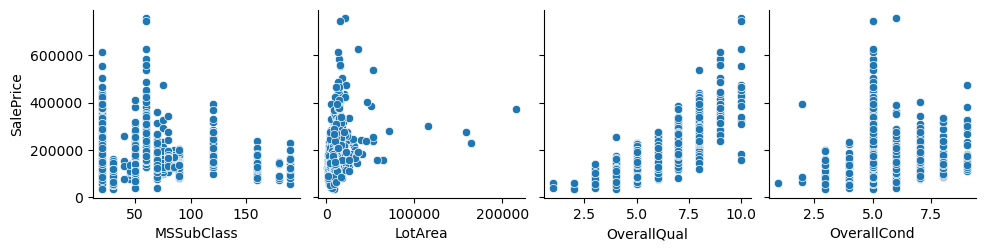

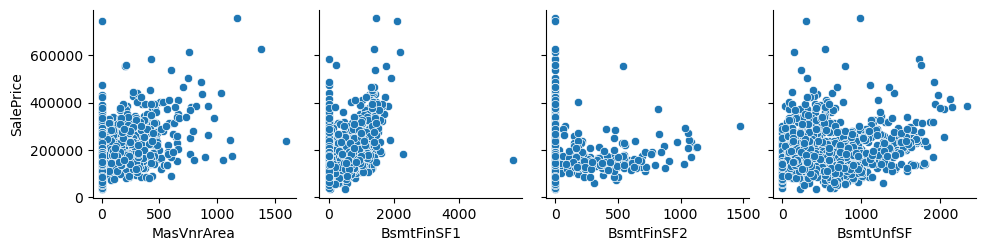

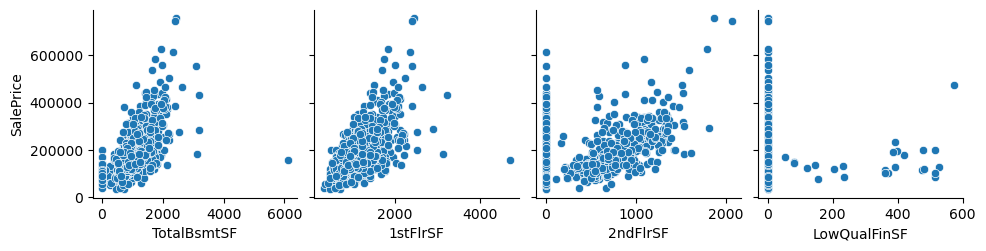

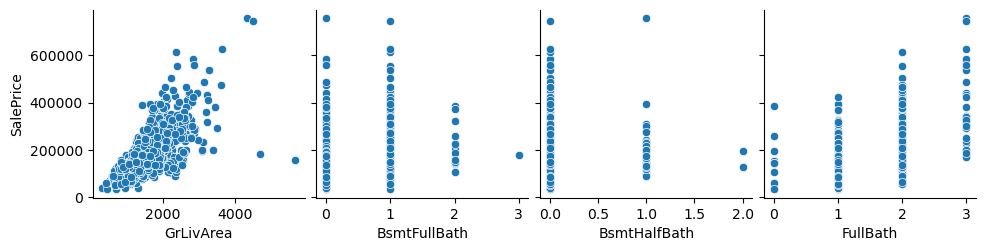

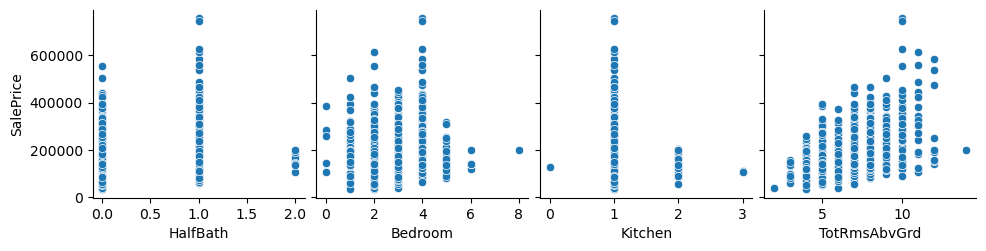

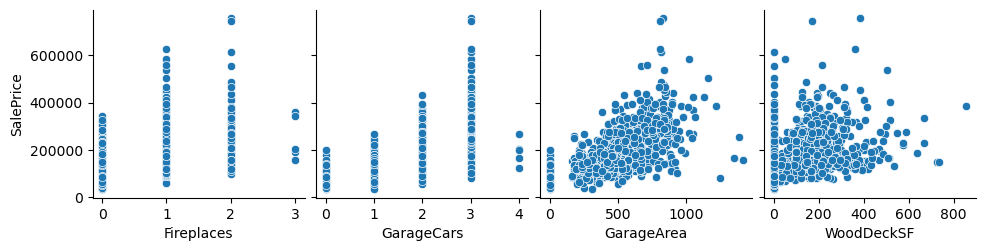

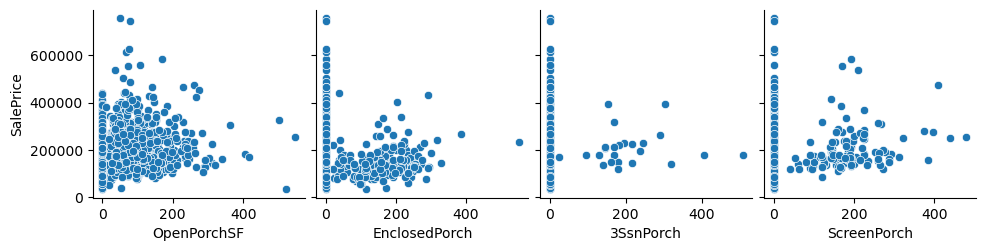

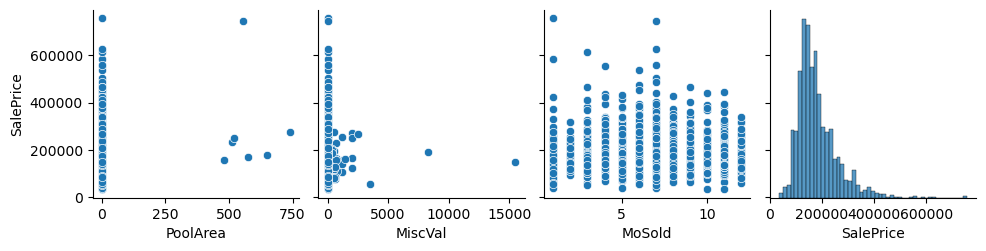

In [237]:
# Heatmap generation

numvarcor = numvar.corr()['SalePrice'][:-1].abs().sort_values(ascending=False)
numvarcor
for i in range(0, len(numvar.columns),4):
    sns.pairplot(numvar, y_vars=['SalePrice'], 
                 x_vars=numvar.columns[i:i+4])


               SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  \
SalePrice       1.000000     0.790982   0.708624    0.640409    0.623431   
OverallQual     0.790982     1.000000   0.593007    0.600671    0.562022   
GrLivArea       0.708624     0.593007   1.000000    0.467247    0.468997   
GarageCars      0.640409     0.600671   0.467247    1.000000    0.882475   
GarageArea      0.623431     0.562022   0.468997    0.882475    1.000000   
TotalBsmtSF     0.613581     0.537808   0.454868    0.434585    0.486665   
1stFlrSF        0.605852     0.476224   0.566024    0.439317    0.489782   
FullBath        0.560664     0.550600   0.630012    0.469672    0.405656   
TotRmsAbvGrd    0.533723     0.427452   0.825489    0.362289    0.337822   
MasVnrArea      0.477493     0.411876   0.390857    0.364204    0.373066   
Fireplaces      0.466929     0.396765   0.461679    0.300789    0.269141   
BsmtFinSF1      0.386420     0.239666   0.208171    0.224054    0.296970   
WoodDeckSF  

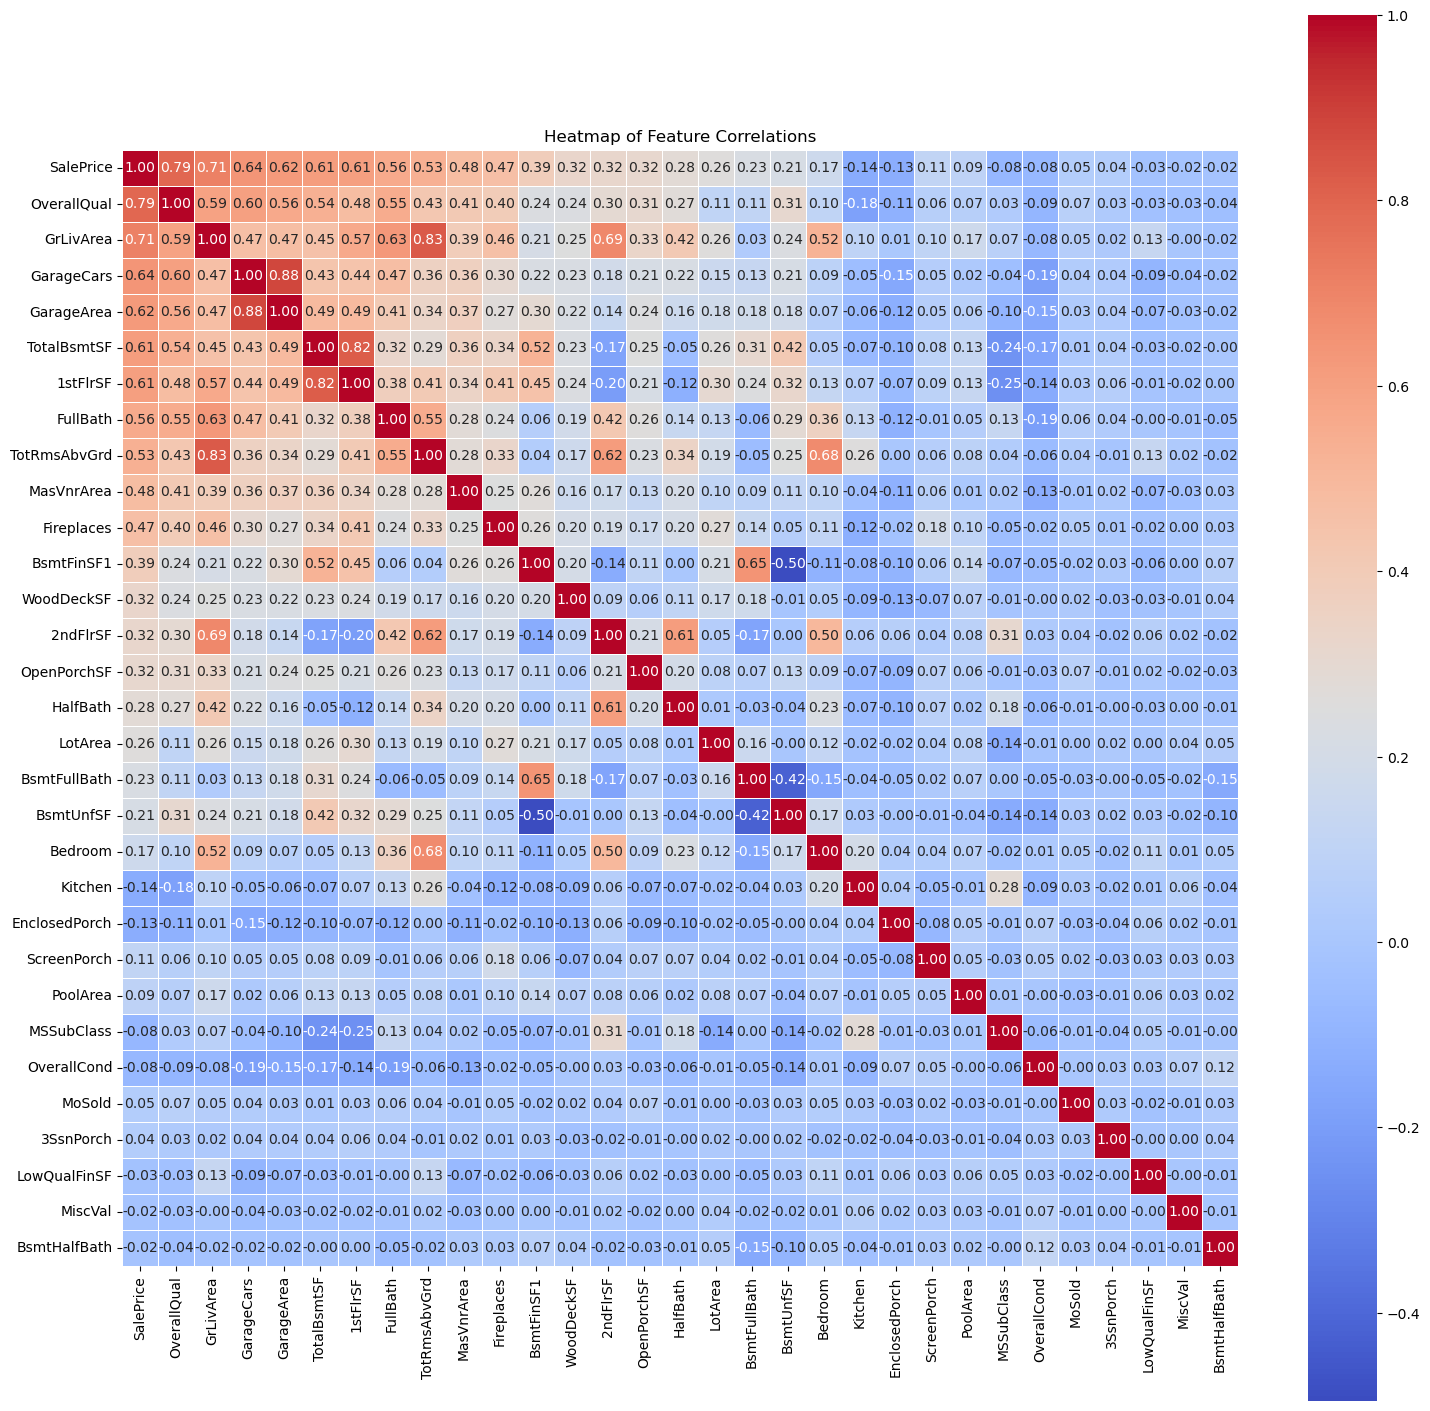

In [238]:


correlations_with_ref_to_saleprice = numvar.corr().loc[:,'SalePrice']
top_correlations = correlations_with_ref_to_saleprice.abs().sort_values(ascending=False).head(31)
top_features_df = numvar.loc[:, top_correlations.index]

feature_correlation_matrix = top_features_df.corr()


print(feature_correlation_matrix)


plt.figure(figsize=(18, 18))  
sns.heatmap(feature_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar=True, square=True, linewidths=.5)
plt.title('Heatmap of Feature Correlations')  
plt.show()

In [239]:
low_correlation_cols = correlations_with_ref_to_saleprice[correlations_with_ref_to_saleprice.abs() < 0.1]
numvar.drop(columns=low_correlation_cols.index, inplace=True)

print("dropped columns")


dropped columns


c:\Users\athar\anaconda3\envs\SimpliPy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


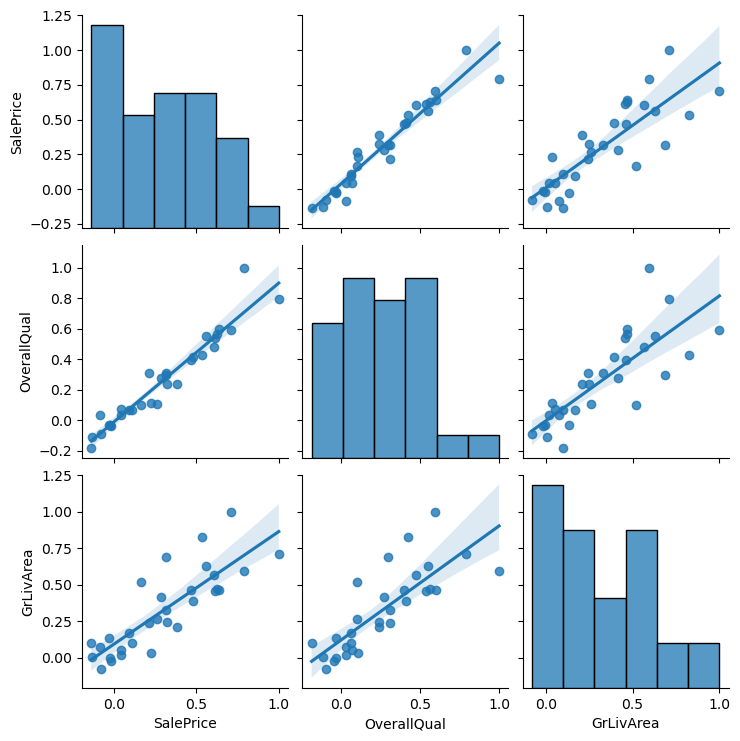

In [240]:
#plot correlation using pairplot

sns.pairplot(feature_correlation_matrix, 
             vars=['SalePrice', 'OverallQual', 'GrLivArea'],
            kind='reg');

Let's take a closer look at some of the high correlation variables against SalePrice

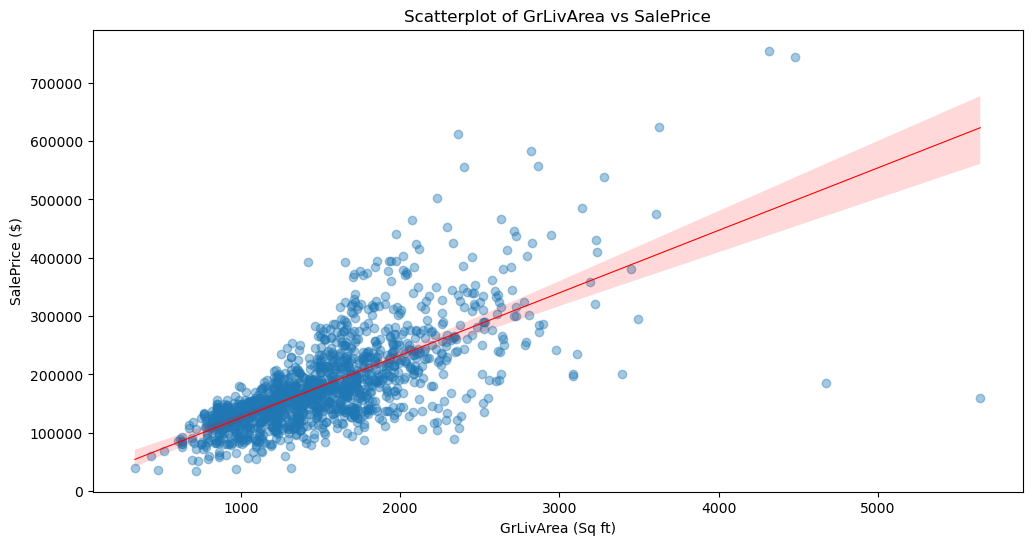

In [241]:
plt.figure(figsize=(12,6))
g = sns.regplot(data=numvar, x='GrLivArea', y='SalePrice', 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8})
plt.xlabel(xlabel='GrLivArea (Sq ft)')
plt.ylabel(ylabel='SalePrice ($)')
plt.title(label='Scatterplot of GrLivArea vs SalePrice')
plt.show()

GRLivArea BoxPlot

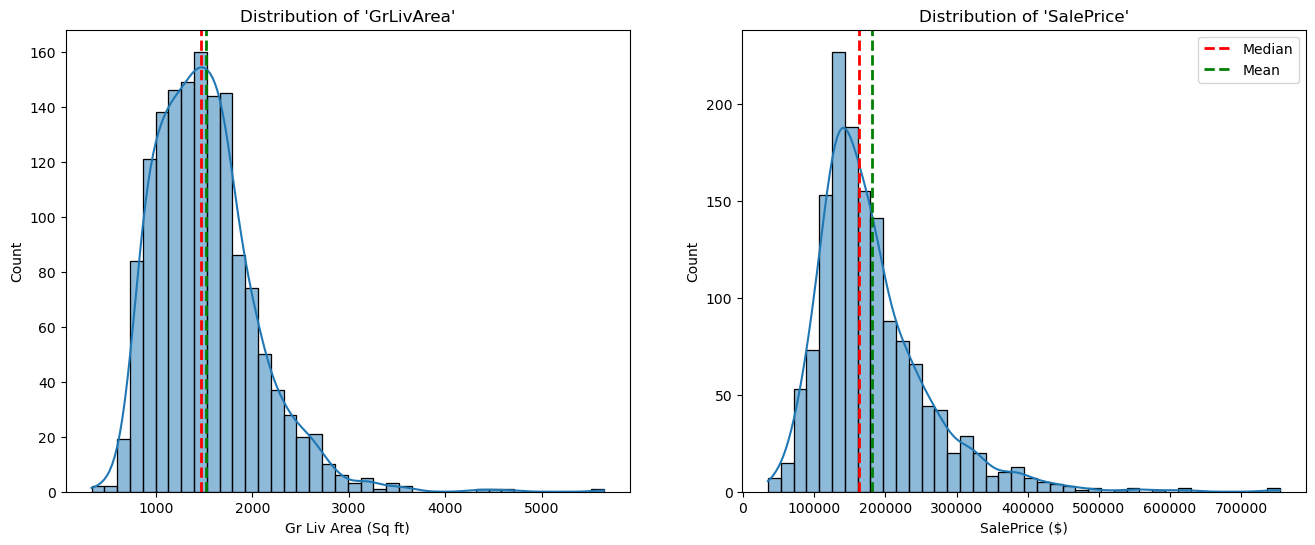

In [242]:
fig, ax = plt.subplots(figsize=(16,6), ncols=2)
sns.histplot(data=numvar, x='GrLivArea',bins=40, kde=True, ax=ax[0])
ax[0].axvline(numvar.loc[:,'GrLivArea'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
ax[0].axvline(numvar.loc[:,'GrLivArea'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')
ax[0].set_title('Distribution of \'GrLivArea\'', fontsize=12)
ax[0].set_xlabel('Gr Liv Area (Sq ft)')

sns.histplot(data=numvar, x='SalePrice',bins=40, kde=True, ax=ax[1])
ax[1].axvline(numvar.loc[:,'SalePrice'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
ax[1].axvline(numvar.loc[:,'SalePrice'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')
ax[1].set_title('Distribution of \'SalePrice\'', fontsize=12)
ax[1].set_xlabel('SalePrice ($)')
plt.legend()
plt.show()


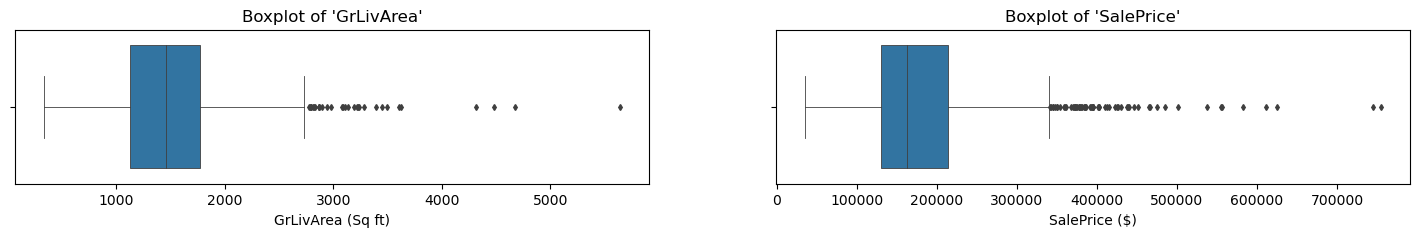

In [243]:
fig, ax = plt.subplots(figsize=(18,2), ncols=2)

sns.boxplot(data=numvar, x='GrLivArea', linewidth=0.6, fliersize=3, ax=ax[0])
ax[0].set_title('Boxplot of \'GrLivArea\'', fontsize=12)
ax[0].set_xlabel('GrLivArea (Sq ft)')

sns.boxplot(data=numvar, x='SalePrice', linewidth=0.6, fliersize=3, ax=ax[1])
ax[1].set_title('Boxplot of \'SalePrice\'', fontsize=12)
ax[1].set_xlabel('SalePrice ($)')

plt.show()

Step 4: Categorical Variable EDA

First, let's bin years so we can encode as a categorical variable

In [244]:
for col in year_columns:
    # Drop NaN values and ensure integer type for year calculations
    valid_years = catvar[col].dropna().astype(int)
    
    if not valid_years.empty:
        # Calculate the minimum and maximum year in the column
        min_year = valid_years.min()
        max_year = valid_years.max()

        # Ensure that the range is rounded down to the nearest decade for the start and up for the end
        start_decade = min_year - (min_year % 10)
        end_decade = max_year + (10 - (max_year % 10))
        
        # Create bins and labels for the decade ranges
        bins = list(range(start_decade, end_decade + 1, 10))
        labels = [f"{decade}s" for decade in bins[:-1]]  # Labels for each decade
        
        # Apply binning
        catvar[f'Decade{col}'] = pd.cut(catvar[col], bins=bins, labels=labels, right=False)

#drop year columns
catvar = catvar.drop(columns=year_columns)

# Print a sample to confirm bins
print(catvar[['Decade' + col for col in year_columns]])


     DecadeYearBuilt DecadeYearRemodAdd DecadeGarageYrBlt DecadeYrSold
Id                                                                    
1              2000s              2000s             2000s        2000s
2              1970s              1970s             1970s        2000s
3              2000s              2000s             2000s        2000s
4              1910s              1970s             1990s        2000s
5              2000s              2000s             2000s        2000s
...              ...                ...               ...          ...
1456           1990s              2000s             1990s        2000s
1457           1970s              1980s             1970s        2010s
1458           1940s              2000s             1940s        2010s
1459           1950s              1990s             1950s        2010s
1460           1960s              1960s             1960s        2000s

[1460 rows x 4 columns]


4.1 MVT

In [245]:
catvar.isnull().sum(axis=0).sort_values(ascending=False)

FireplaceQu           690
GarageFinish           81
GarageCond             81
DecadeGarageYrBlt      81
GarageType             81
GarageQual             81
BsmtFinType2           38
BsmtExposure           38
BsmtQual               37
BsmtCond               37
BsmtFinType1           37
Electrical              1
PavedDrive              0
SaleType                0
SaleCondition           0
priceLevel              0
DecadeYearBuilt         0
DecadeYearRemodAdd      0
Functional              0
KitchenQual             0
CentralAir              0
HeatingQC               0
Heating                 0
MSZoning                0
Street                  0
Condition2              0
LotShape                0
LandContour             0
Utilities               0
LotConfig               0
LandSlope               0
Neighborhood            0
Condition1              0
BldgType                0
Foundation              0
HouseStyle              0
RoofStyle               0
RoofMatl                0
Exterior1st 

In [246]:
#make new unknown category for FireplaceQu (we're not going to delete it, but it is too much to fill with mode)
catvar['FireplaceQu'].fillna('Unknown', inplace=True)

#drop tiny missing values from Electrical
catvar.dropna(subset=['Electrical'], inplace=True)

#we'll handle the rest using mode 

# Identify columns with at least one missing value that are not in the exclude list
cols_with_missing = catvar.columns[catvar.isnull().any()].difference(['Electrical', 'FireplaceQu'])

# For each of these columns, fill missing values with the mode of the column
for col in cols_with_missing:
    mode_value = catvar[col].mode()[0]  # Get the most frequent value (mode)
    catvar[col].fillna(mode_value, inplace=True)

#missing check!
catvar.isnull().sum(axis=0).sort_values(ascending=False)
if catvar.isnull().sum(axis=0).sum() == 0:
    print ("done")

done


In [247]:
catvar.shape

(1459, 43)

Bar + Bivariate Analysis

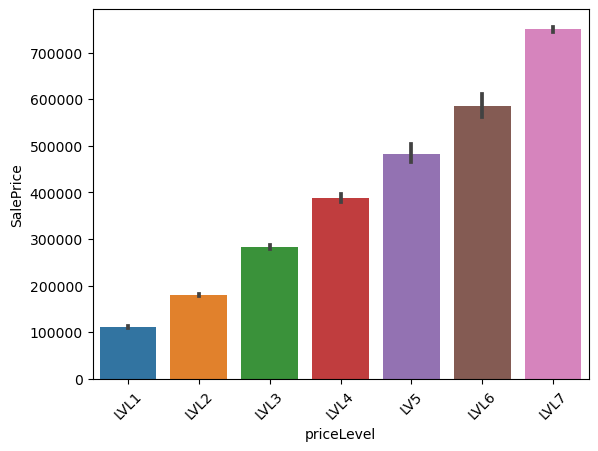

In [248]:
ax = sns.barplot(x=catvar['priceLevel'], y=numvar['SalePrice'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

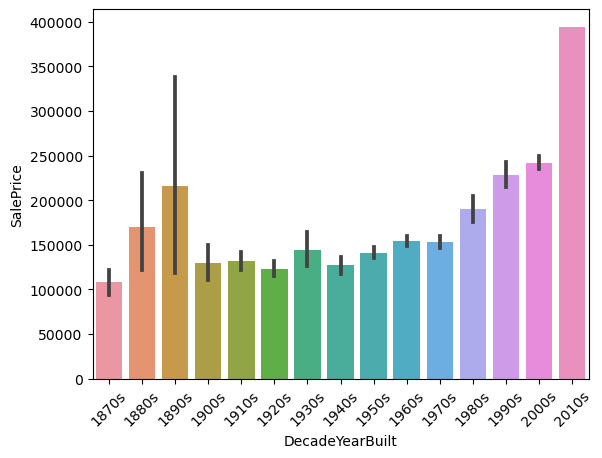

In [249]:
ax = sns.barplot(x=catvar['DecadeYearBuilt'], y=numvar['SalePrice'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Box Plot + Bivariate Analysis

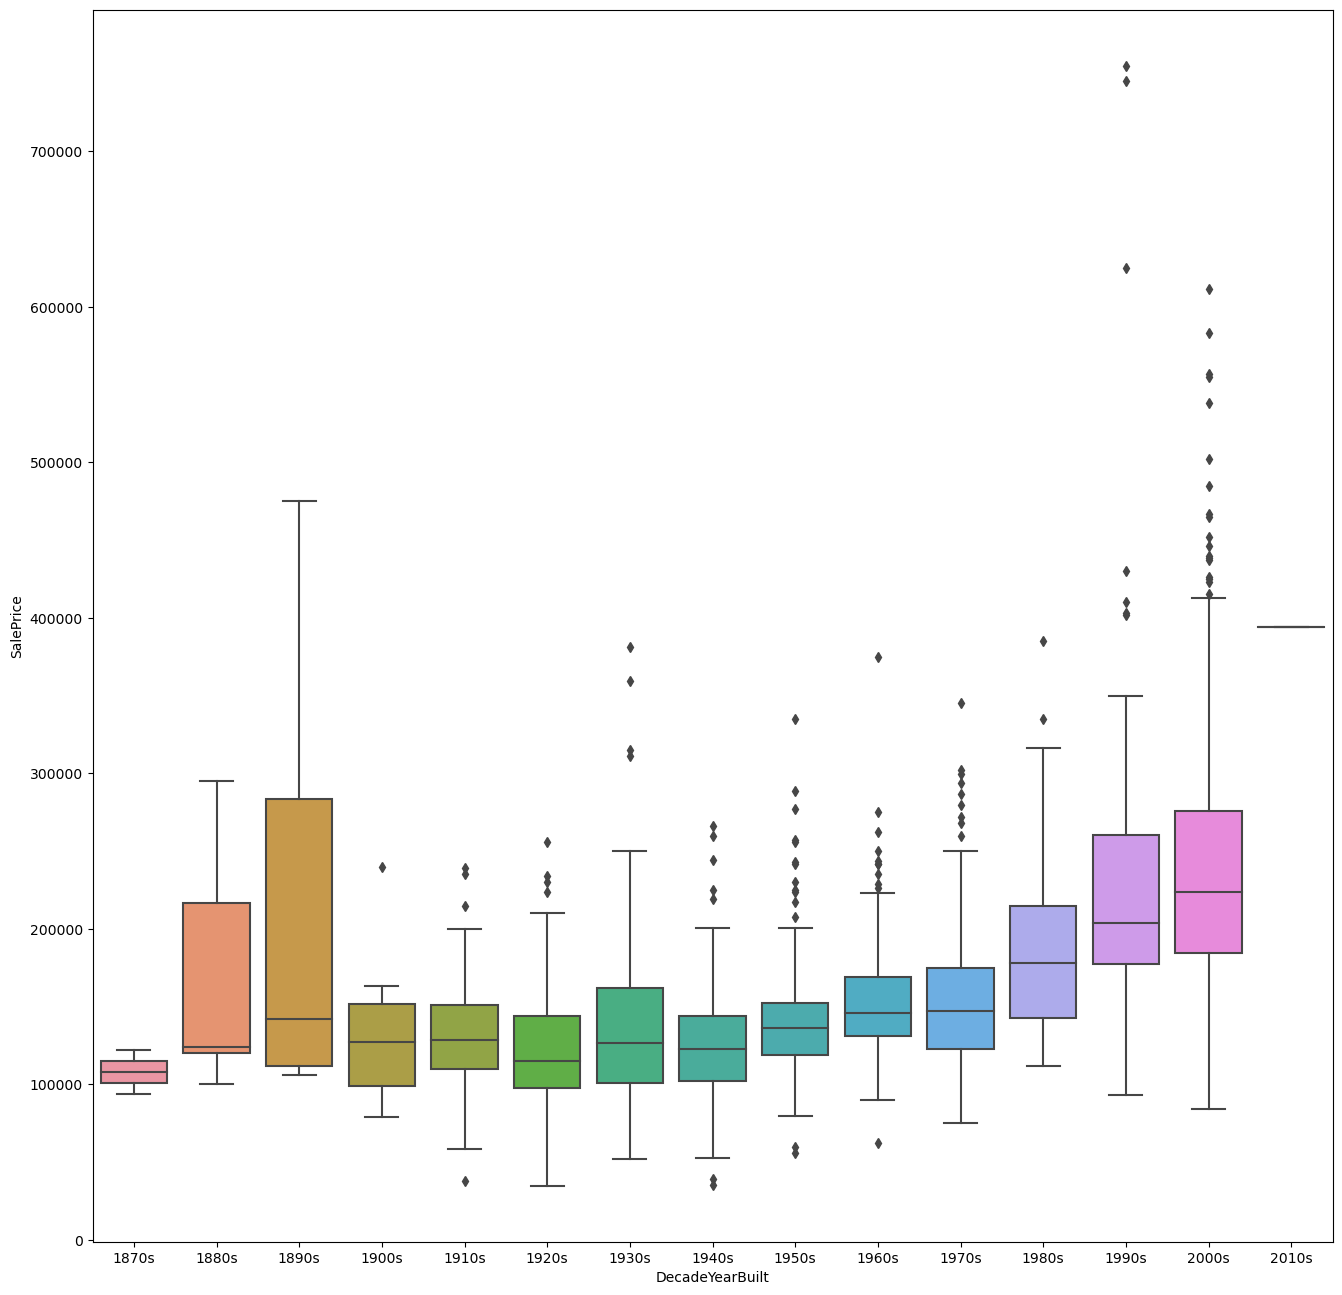

In [250]:
plt.figure(figsize=(16, 16))
sns.boxplot(x=catvar['DecadeYearBuilt'], y=numvar['SalePrice'])
plt.show()

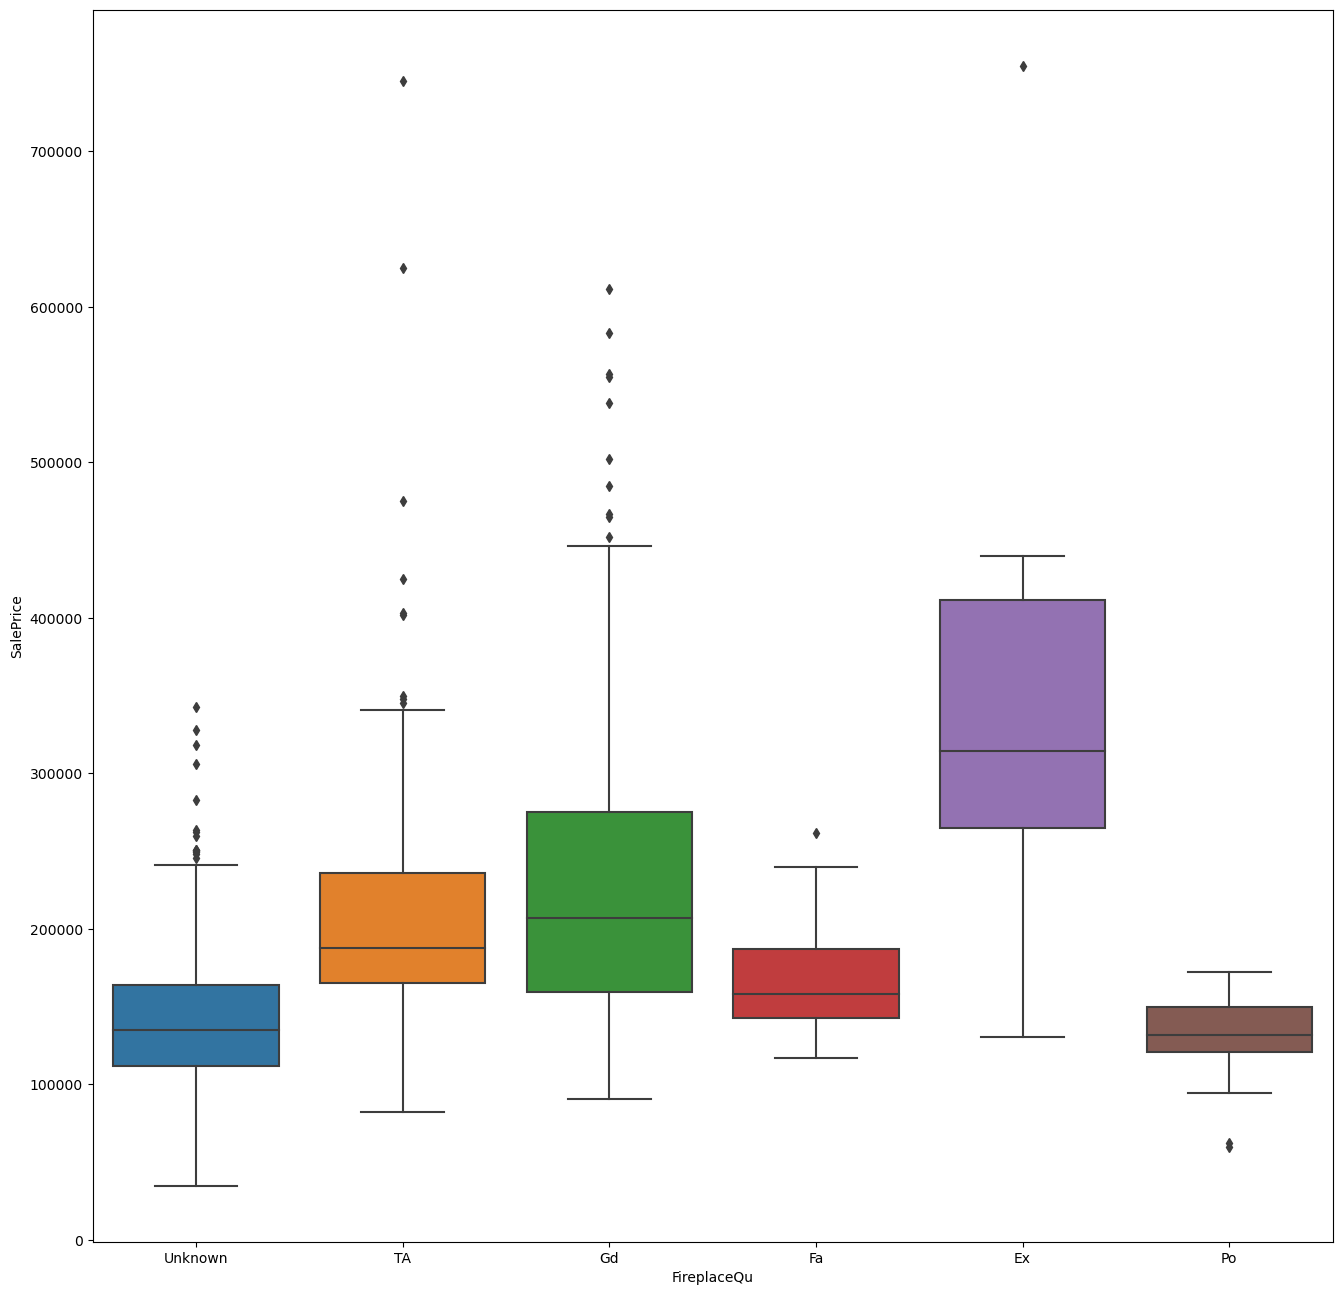

In [251]:
plt.figure(figsize=(16, 16))
sns.boxplot(x=catvar['FireplaceQu'], y=numvar['SalePrice'])
plt.show()

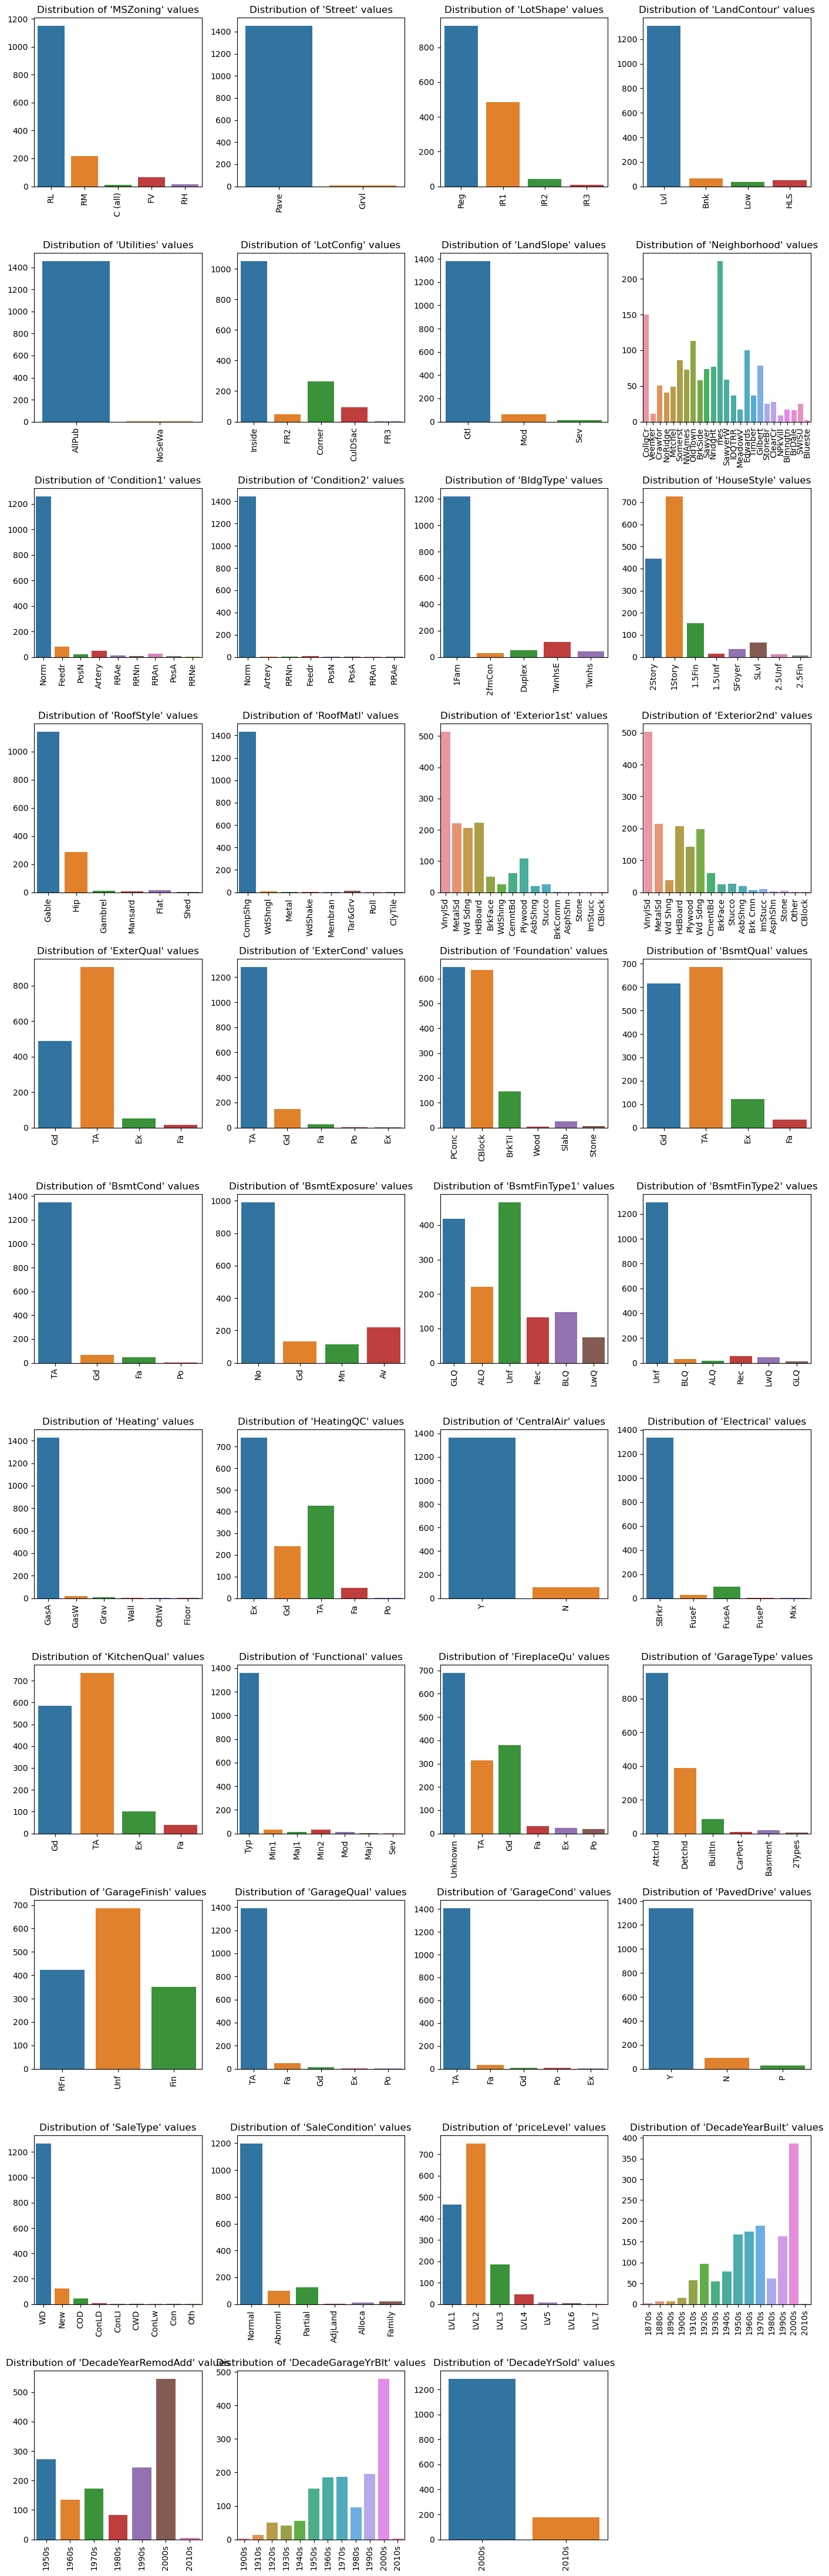

In [252]:

def subplot_distributions(dataframe, list_of_columns, rotate_xticks=90, xtick_fontsize=10):
    nrows = int(np.ceil(len(list_of_columns) / 4))  # Rows needed
    ncols = 4  # Columns: fixed to 4 as per original design
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
    axes = axes.ravel()  # Flatten the axes array for easier iteration

    for i, column in enumerate(list_of_columns):
        sns.countplot(data=dataframe, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of \'{column}\' values', fontsize=12)
        plt.setp(axes[i].get_xticklabels(), rotation=rotate_xticks, fontsize=xtick_fontsize)
        axes[i].set_xlabel("")  # Clear x-axis label
        axes[i].set_ylabel("")  # Clear y-axis label

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_axis_off()

    plt.tight_layout()
    plt.show()

# Example usage
subplot_distributions(catvar, catvar.columns)


In [253]:


threshold = 90.0


nominal_stats = {'column': [], 'most_frequent_value': [], 'percentage_occurrence': [], 'column_status': []}

for col in catvar.columns:
    mode = catvar[col].mode()[0]
    proportion = (catvar[col] == mode).mean() * 100
    
    # Append results to the stats dictionary
    nominal_stats['column'].append(col)
    nominal_stats['most_frequent_value'].append(mode)
    nominal_stats['percentage_occurrence'].append(np.round(proportion, 1))
    nominal_stats['column_status'].append('' if proportion < threshold else 'severe skewed')

# Create DataFrame from the dictionary
nominal_stats_df = pd.DataFrame(nominal_stats)

# Display the DataFrame
nominal_stats_df


column most_frequent_value  percentage_occurrence  \
0             MSZoning                  RL                   78.8   
1               Street                Pave                   99.6   
2             LotShape                 Reg                   63.3   
3          LandContour                 Lvl                   89.8   
4            Utilities              AllPub                   99.9   
5            LotConfig              Inside                   72.0   
6            LandSlope                 Gtl                   94.7   
7         Neighborhood                 mes                   15.4   
8           Condition1                Norm                   86.3   
9           Condition2                Norm                   99.0   
10            BldgType                1Fam                   83.6   
11          HouseStyle              1Story                   49.8   
12           RoofStyle               Gable                   78.1   
13            RoofMatl             CompShg                   98.2   
14         Exterior1st             VinylSd                   35.2   
15         Exterior2nd             VinylSd                   34.5   
16           ExterQual                  TA                   62.0   
17           ExterCond                  TA                   87.8   
18          Foundation               PConc                   44.3   
19            BsmtQual                  TA                   47.0   
20            BsmtCond                  TA                   92.3   
21        BsmtExposure                  No                   67.9   
22        BsmtFinType1                 Unf                   31.9   
23        BsmtFinType2                 Unf                   88.6   
24             Heating                GasA                   97.8   
25           HeatingQC                  Ex                   50.8   
26          CentralAir                   Y                   93.5   
27          Electrical               SBrkr                   91.4   
28         KitchenQual                  TA                   50.4   
29          Functional                 Typ                   93.1   
30         FireplaceQu             Unknown                   47.2   
31          GarageType              Attchd                   65.2   
32        GarageFinish                 Unf                   47.0   
33          GarageQual                  TA                   95.3   
34          GarageCond                  TA                   96.4   
35          PavedDrive                   Y                   91.8   
36            SaleType                  WD                   86.8   
37       SaleCondition              Normal                   82.0   
38          priceLevel                LVL2                   51.4   
39     DecadeYearBuilt               2000s                   26.5   
40  DecadeYearRemodAdd               2000s                   37.4   
41   DecadeGarageYrBlt               2000s                   32.8   
42        DecadeYrSold               2000s                   88.0   

    column_status  
0                  
1   severe skewed  
2                  
3                  
4   severe skewed  
5                  
6   severe skewed  
7                  
8                  
9   severe skewed  
10                 
11                 
12                 
13  severe skewed  
14                 
15                 
16                 
17                 
18                 
19                 
20  severe skewed  
21                 
22                 
23                 
24  severe skewed  
25                 
26  severe skewed  
27  severe skewed  
28                 
29  severe skewed  
30                 
31                 
32                 
33  severe skewed  
34  severe skewed  
35  severe skewed  
36                 
37                 
38                 
39                 
40                 
41                 
42

In [254]:
# Drop columns from catvar where the percentage_occurrence exceeds the threshold
columns_to_drop = nominal_stats_df[nominal_stats_df['percentage_occurrence'] > threshold]['column']
catvar.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Update the list of nominal columns after dropping
nominal_columns = list(catvar.select_dtypes([object]).columns)

# Output the shape of catvar after modifications
catvar.shape


(1459, 30)

Encoding for Chi Square

In [255]:
encatvar=catvar
for col in encatvar.columns:
    le = LabelEncoder()
    encatvar[col] = le.fit_transform(encatvar[col])
encatvar.head(3)

MSZoning  LotShape  LandContour  LotConfig  Neighborhood  Condition1  \
Id                                                                         
1          3         3            3          4             5           2   
2          3         3            3          2            23           1   
3          3         0            3          4             5           2   

    BldgType  HouseStyle  RoofStyle  Exterior1st  ...  FireplaceQu  \
Id                                                ...                
1          0           5          1           12  ...            5   
2          0           2          1            8  ...            4   
3          0           5          1           12  ...            4   

    GarageType  GarageFinish  SaleType  SaleCondition  priceLevel  \
Id                                                                  
1            1             1         8              4           2   
2            1             1         8              4           2   
3            1             1         8              4           2   

    DecadeYearBuilt  DecadeYearRemodAdd  DecadeGarageYrBlt  DecadeYrSold  
Id                                                                        
1                13                   5                 10             0  
2                10                   2                  7             0  
3                13                   5                 10             0  

[3 rows x 30 columns]

In [256]:
targety = encatvar['priceLevel']
# new_category.drop("priceLevel")
xencode = encatvar.drop("priceLevel", axis=1)
X_train, X_test, y_train, y_test = train_test_split(xencode, targety, 
                                            test_size=0.3, 
                                            random_state=12)
y_train = y_train.squeeze()

In [257]:
chi_scor = chi2(X_train, y_train)
print(chi_scor)

(array([ 10.39776671,  79.84445316,   1.31894437,   8.78013288,
        27.79263609,   8.98961619,  21.61223987,  88.58017941,
        34.98888369,  18.77379928,  24.31516117,  69.84237263,
         1.97818292,  54.50438835, 111.43089585,  57.80268922,
        26.27506026,   1.75776713, 299.83927491,  91.50772914,
       104.09081943, 196.23690927, 150.96263816,   2.79985754,
        22.50556419, 288.93601229, 352.14471278, 126.40511111,
         0.94986139]), array([1.08869963e-01, 3.84720269e-15, 9.70602820e-01, 1.86326038e-01,
       1.02798410e-04, 1.74162892e-01, 1.42315042e-03, 5.97374224e-17,
       4.33092591e-06, 4.56320573e-03, 4.56933824e-04, 4.40483124e-13,
       9.21694133e-01, 5.83633995e-10, 1.02234185e-21, 1.25644194e-10,
       1.97846203e-04, 9.40574994e-01, 8.85542282e-62, 1.47283046e-17,
       3.51063509e-20, 1.19955408e-39, 4.84210966e-30, 8.33514952e-01,
       9.80170077e-04, 1.91808399e-59, 5.34604479e-73, 7.33937136e-25,
       9.87441728e-01]))


In [258]:
pvalues = pd.Series(chi_scor[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=False) < 0.05

DecadeYrSold          False
LandContour           False
BsmtFinType2          False
ExterCond             False
SaleType              False
LotConfig             False
Condition1            False
MSZoning              False
Exterior1st            True
BldgType               True
SaleCondition          True
Exterior2nd            True
BsmtFinType1           True
Neighborhood           True
RoofStyle              True
Foundation             True
BsmtExposure           True
ExterQual              True
LotShape               True
HouseStyle             True
KitchenQual            True
FireplaceQu            True
BsmtQual               True
DecadeGarageYrBlt      True
GarageFinish           True
GarageType             True
DecadeYearBuilt        True
HeatingQC              True
DecadeYearRemodAdd     True
dtype: bool

in graph form

<Axes: >

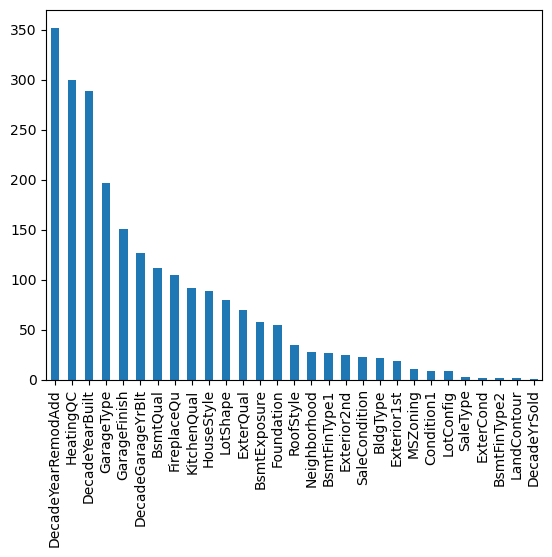

In [259]:
chi_values = pd.Series(chi_scor[0], index=X_train.columns)
chi_values.sort_values(ascending=False, inplace=True)

#Plot to see how high the chi value
chi_values.plot.bar()

<Axes: >

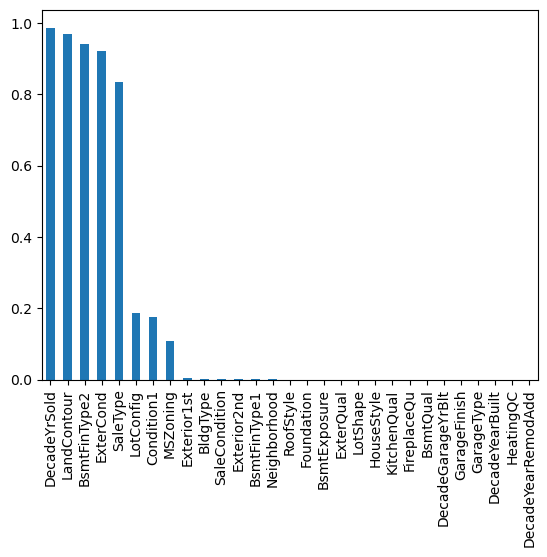

In [260]:
# Lower the p value < 0.05 the higher the importance
p_values = pd.Series(chi_scor[1], index=X_train.columns)
p_values.sort_values(ascending=False, inplace=True)

#Plot to see how high the chi value
p_values.plot.bar()

In [261]:

significant_features = p_values[p_values < 0.05]
print("Significant features based on p-values < 0.05:")
print(significant_features)

significant_features.index.tolist()

Significant features based on p-values < 0.05:
Exterior1st           4.563206e-03
BldgType              1.423150e-03
SaleCondition         9.801701e-04
Exterior2nd           4.569338e-04
BsmtFinType1          1.978462e-04
Neighborhood          1.027984e-04
RoofStyle             4.330926e-06
Foundation            5.836340e-10
BsmtExposure          1.256442e-10
ExterQual             4.404831e-13
LotShape              3.847203e-15
HouseStyle            5.973742e-17
KitchenQual           1.472830e-17
FireplaceQu           3.510635e-20
BsmtQual              1.022342e-21
DecadeGarageYrBlt     7.339371e-25
GarageFinish          4.842110e-30
GarageType            1.199554e-39
DecadeYearBuilt       1.918084e-59
HeatingQC             8.855423e-62
DecadeYearRemodAdd    5.346045e-73
dtype: float64


['Exterior1st',
 'BldgType',
 'SaleCondition',
 'Exterior2nd',
 'BsmtFinType1',
 'Neighborhood',
 'RoofStyle',
 'Foundation',
 'BsmtExposure',
 'ExterQual',
 'LotShape',
 'HouseStyle',
 'KitchenQual',
 'FireplaceQu',
 'BsmtQual',
 'DecadeGarageYrBlt',
 'GarageFinish',
 'GarageType',
 'DecadeYearBuilt',
 'HeatingQC',
 'DecadeYearRemodAdd']

In [262]:
significant_columns = significant_features.index.tolist()

# Now, select these columns from catvar
significant_catvar = encatvar[significant_columns]

# Show the resulting DataFrame with only significant columns
significant_catvar.head

<bound method NDFrame.head of       Exterior1st  BldgType  SaleCondition  Exterior2nd  BsmtFinType1  \
Id                                                                      
1              12         0              4           13             2   
2               8         0              4            8             0   
3              12         0              4           13             2   
4              13         0              0           15             0   
5              12         0              4           13             2   
...           ...       ...            ...          ...           ...   
1456           12         0              4           13             5   
1457            9         0              4           10             0   
1458            5         0              4            5             2   
1459            8         0              4            8             2   
1460            6         0              4            6             1   

      Neighborhood  

Step 5: Combine Datasets!

In [263]:
new_data = pd.merge(significant_catvar, numvar, left_index=True, right_index=True)
new_data.head(3)

Exterior1st  BldgType  SaleCondition  Exterior2nd  BsmtFinType1  \
Id                                                                    
1            12         0              4           13             2   
2             8         0              4            8             0   
3            12         0              4           13             2   

    Neighborhood  RoofStyle  Foundation  BsmtExposure  ExterQual  ...  \
Id                                                                ...   
1              5          1           2             3          2  ...   
2             23          1           1             1          3  ...   
3              5          1           2             2          2  ...   

    Kitchen  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
Id                                                                          
1         1             8           0           2         548           0   
2         1             6           1           2         460         298   
3         1             6           1           2         608           0   

    OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
Id                                                      
1            61              0            0     208500  
2             0              0            0     181500  
3            42              0            0     223500  

[3 rows x 44 columns]

In [264]:
new_data.shape

(1459, 44)

6a. Discovering Outliers for Multiple Features

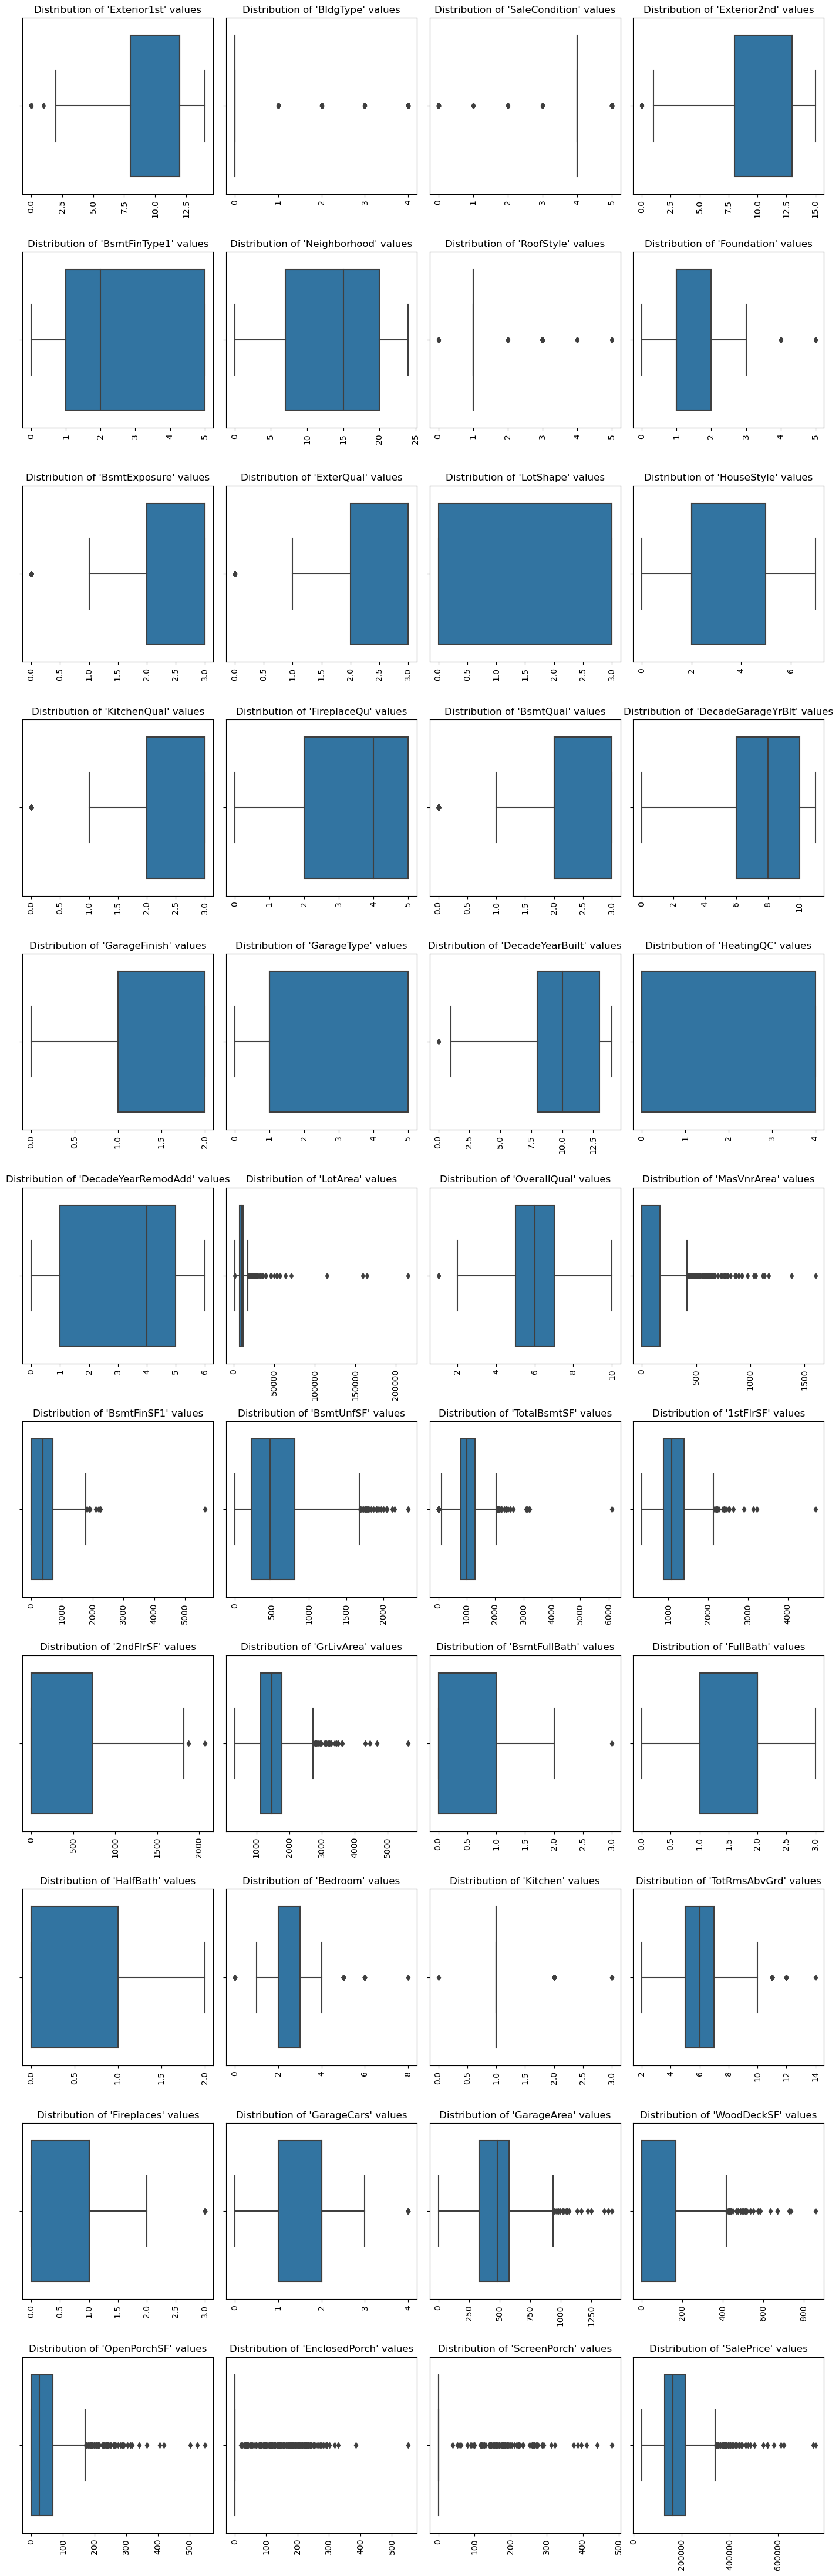

In [265]:
def subplot_box(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4))
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4*nrows))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.boxplot(data=dataframe,x=new_data[column], ax=ax[i])
        ax[i].set_title('Distribution of \'' + column + '\' values', fontsize=12)
        plt.setp(ax[i].get_xticklabels(), rotation=90, fontsize=10) # smaller font for x-tick
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
    if len(list_of_columns) < nrows*ncols:
        for i in range(nrows*ncols - len(list_of_columns)):
            ax[nrows*ncols - 1 - i].set_axis_off() # get rid of empty subplots if they are present
    fig.tight_layout()

subplot_box(new_data, new_data.columns)

The end!
Thank you for reading.